## Problem Statement

The BCCI has hired an external analytics consulting firm to leverage data analytics. The primary objective is to extract actionable insights from historical match data and develop strategies to increase the Indian Cricket Team's winning chances.

This project focuses on creating Machine Learning models that predict wins for the Indian team. After developing a model, we will extract actionable insights and recommendations to optimize performance.

**Match Predictions and Strategic Recommendations**

We will predict the outcome of the next 10 matches India will play. If a loss is predicted, we will refine the model by incorporating new insights and strategic adjustments until a win is predicted.

**Dynamic Strategies for Each Match**

To counter potential opponent adaptations, we will develop unique strategies for each match based on the provided data set's variables. These strategies will consider feasibility and practicality.

**Match Details**

1.   Test match with England in England (Day Matches) - Rainy season expected
2.   T20 matches with Australia in India (Day/Night Matches) - Winter season expected
3. ODI matches with Sri Lanka in India (Day/Night Matches) - Winter season expected


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

## Read the data

In [ ]:
df = pd.read_excel('/content/Sports Data.xlsx', sheet_name='data')
print(df.columns)

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')


In [ ]:
pd.options.display.max_columns = None

In [ ]:
df.tail(5)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
2925,Game_995,Win,30.0,Day,ODI,1.0,1,3.0,Bowling,England,Winter,74536.0,No,25.0,4,13.0,6,4.0,13.0,8,33.0,3,3
2926,Game_996,Loss,30.0,Day,ODI,1.0,1,2.0,Bowling,Bangladesh,Rainy,95270.0,Yes,12.0,4,15.0,2,4.0,7.0,6,56.0,3,3
2927,Game_997,Loss,30.0,Day,ODI,1.0,1,1.0,Bowling,Srilanka,Winter,23856.0,No,13.0,1,8.0,2,3.0,6.0,3,38.0,1,1
2928,Game_998,Win,30.0,Day,T20,1.0,1,4.0,Bowling,Zimbabwe,Summer,20881.0,No,14.0,1,4.0,0,3.0,6.0,2,57.0,3,1
2929,Game_999,Win,30.0,Day,ODI,3.0,1,4.0,Bowling,Pakistan,Rainy,53424.0,Yes,12.0,3,10.0,2,3.0,8.0,7,72.0,3,3


## Eleminate special charectors if there are any

In [ ]:
df.columns =df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

## Checking Duplicate rows

In [ ]:
if df.duplicated().any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [ ]:
df.shape

(2930, 23)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


## Check Null Values

In [ ]:
df.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [ ]:
df.isnull().sum().sum()

789

## The are total 789 null values in the dataset



In [ ]:
missing_values = df.isnull().sum()

total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Game_number               0.000000
Result                    0.000000
Avg_team_Age              3.310580
Match_light_type          1.774744
Match_format              2.389078
Bowlers_in_team           2.798635
Wicket_keeper_in_team     0.000000
All_rounder_in_team       1.365188
First_selection           2.013652
Opponent                  1.228669
Season                    2.116041
Audience_number           2.764505
Offshore                  2.184300
Max_run_scored_1over      0.955631
Max_wicket_taken_1over    0.000000
Extra_bowls_bowled        0.989761
Min_run_given_1over       0.000000
Min_run_scored_1over      0.921502
Max_run_given_1over       1.160410
extra_bowls_opponent      0.000000
player_highest_run        0.955631
Players_scored_zero       0.000000
player_highest_wicket     0.000000
dtype: float64


### No column in the dataset has more than 30% of missing values so we don't need to drop any column


## Treating null values

In [ ]:
print(df.columns)


Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')


In [ ]:
df['Avg_team_Age'].fillna(df['Avg_team_Age'].mean(), inplace=True)
df['Bowlers_in_team'].fillna(df['Bowlers_in_team'].mean(), inplace=True)
df['All_rounder_in_team'].fillna(df['All_rounder_in_team'].mean(), inplace=True)
df['Audience_number'].fillna(df['Audience_number'].mean(), inplace=True)
df['Max_run_scored_1over'].fillna(df['Max_run_scored_1over'].mean(), inplace=True)
df['Extra_bowls_bowled'].fillna(df['Extra_bowls_bowled'].mean(), inplace=True)
df['Min_run_scored_1over'].fillna(df['Min_run_scored_1over'].mean(), inplace=True)
df['Min_run_scored_1over'].fillna(df['Min_run_scored_1over'].mean(), inplace=True)
df['Max_run_given_1over'].fillna(df['Max_run_given_1over'].mean(), inplace=True)
df['player_highest_run'].fillna(df['player_highest_run'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age               0
Match_light_type          52
Match_format              70
Bowlers_in_team            0
Wicket_keeper_in_team      0
All_rounder_in_team        0
First_selection           59
Opponent                  36
Season                    62
Audience_number            0
Offshore                  64
Max_run_scored_1over       0
Max_wicket_taken_1over     0
Extra_bowls_bowled         0
Min_run_given_1over        0
Min_run_scored_1over       0
Max_run_given_1over        0
extra_bowls_opponent       0
player_highest_run         0
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

## lets treat the null values in object type columns seperately.

In [ ]:
# Impute missing values with mode for each column
mode_values = df[['Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore']].mode().iloc[0]
df[['Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore']] = df[['Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore']].fillna(mode_values)


In [ ]:
df.isnull().sum()

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

## All the null values are treated

In [ ]:
df.columns

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

In [ ]:
df['player_highest_wicket'].loc[df['player_highest_wicket'] == 'Three'] = 3
df['Match_format'].loc[df['Match_format'] == '20-20'] = 'T20'
df['First_selection'].loc[df['First_selection'] == 'Bat'] = 'Batting'
df['Players_scored_zero'].loc[df['Players_scored_zero'] == 'Three'] = 3

In [ ]:
df['player_highest_wicket'].unique()

array([1, 3, 2, 4, 5], dtype=object)

In [ ]:
df['Match_format'].unique()

array(['ODI', 'T20', 'Test'], dtype=object)

In [ ]:
df['First_selection'].unique()

array(['Bowling', 'Batting'], dtype=object)

In [ ]:
df['Players_scored_zero'].unique()

array([3, 2, 4, 1], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2930 non-null   float64
 3   Match_light_type        2930 non-null   object 
 4   Match_format            2930 non-null   object 
 5   Bowlers_in_team         2930 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2930 non-null   float64
 8   First_selection         2930 non-null   object 
 9   Opponent                2930 non-null   object 
 10  Season                  2930 non-null   object 
 11  Audience_number         2930 non-null   float64
 12  Offshore                2930 non-null   object 
 13  Max_run_scored_1over    2930 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [ ]:
df['Players_scored_zero'] = df['Players_scored_zero'].astype(int)
# Check the data type after conversion
print(df['Players_scored_zero'].dtype)

int64


In [ ]:
df['player_highest_wicket'] = df['player_highest_wicket'].astype(int)
# Check the data type after conversion
print(df['player_highest_wicket'].dtype)

int64


##Univarient analysis

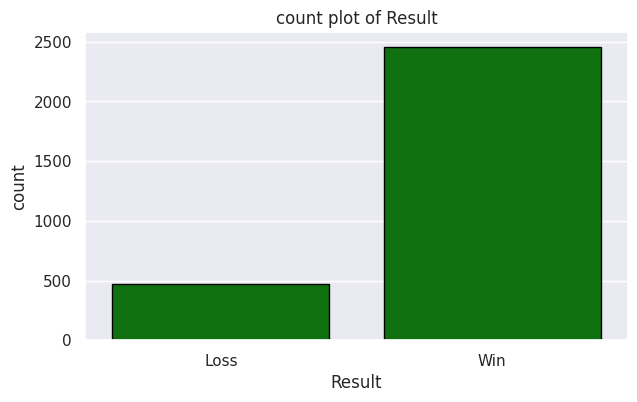

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Result', color='green', edgecolor='black')
plt.xlabel('Result')
plt.title('count plot of Result')
plt.show()

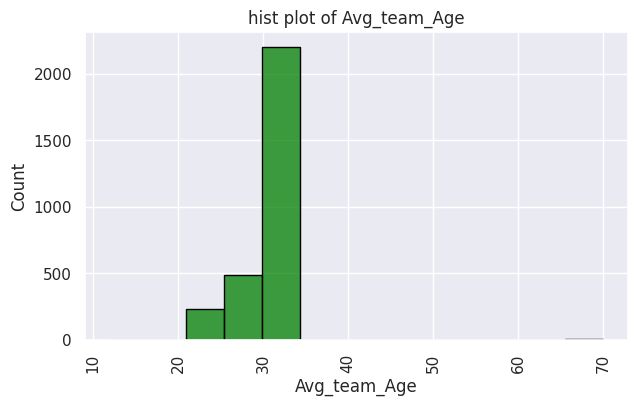

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='Avg_team_Age', color='green', edgecolor='black')
plt.xlabel('Avg_team_Age')
plt.title('hist plot of Avg_team_Age')
plt.xticks(rotation=90)
plt.show()

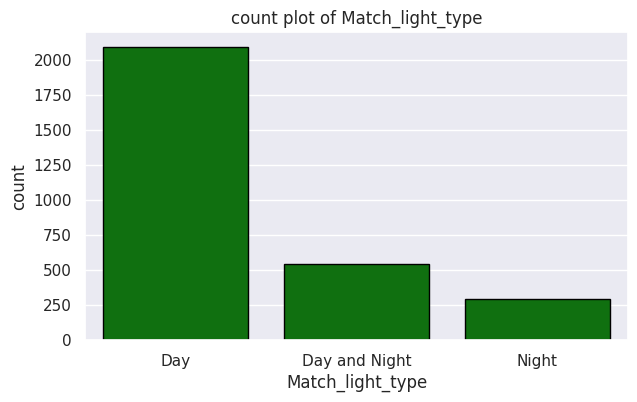

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Match_light_type', color='green', edgecolor='black')
plt.xlabel('Match_light_type')
plt.title('count plot of Match_light_type')
plt.show()

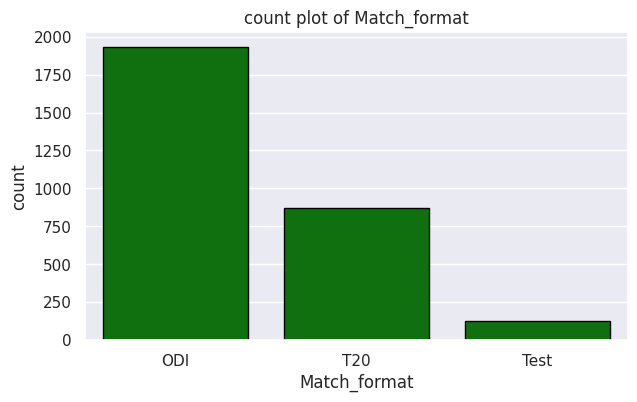

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Match_format', color='green', edgecolor='black')
plt.xlabel('Match_format')
plt.title('count plot of Match_format')
plt.show()

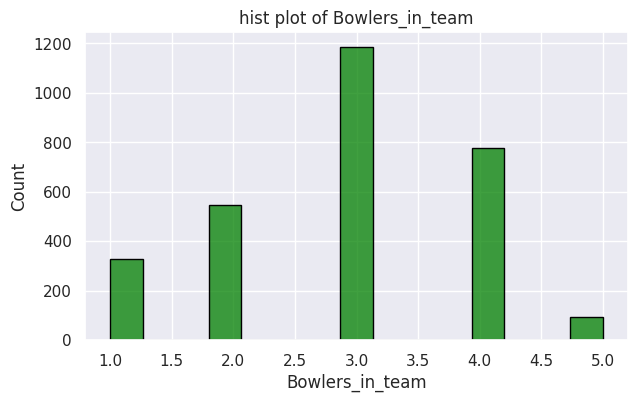

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='Bowlers_in_team',color='green', edgecolor='black')
plt.xlabel('Bowlers_in_team')
plt.title('hist plot of Bowlers_in_team')
plt.show()

In [ ]:
df['Wicket_keeper_in_team'].unique()

array([1])

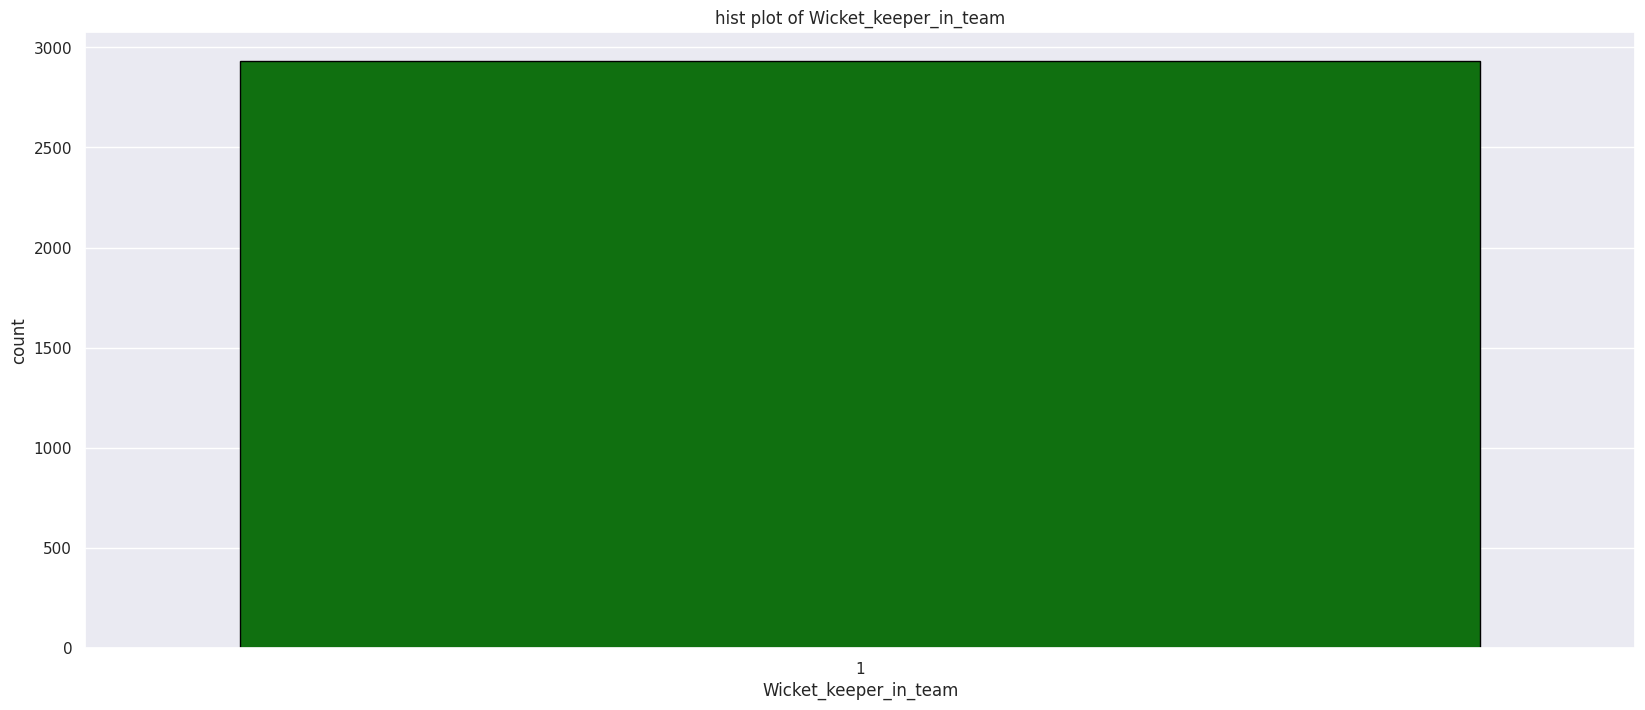

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Wicket_keeper_in_team', color='green', edgecolor='black')
plt.xlabel('Wicket_keeper_in_team')
plt.title('hist plot of Wicket_keeper_in_team')
plt.show()

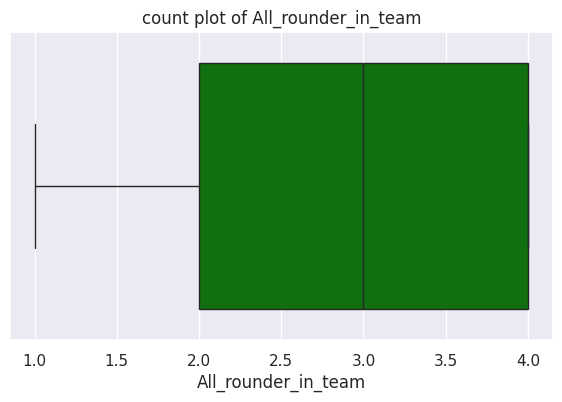

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='All_rounder_in_team', color='green')
plt.xlabel('All_rounder_in_team')
plt.title('count plot of All_rounder_in_team')
plt.show()

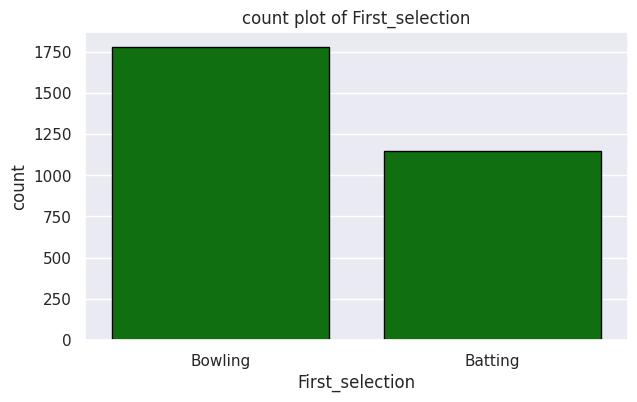

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='First_selection', color='green', edgecolor='black')
plt.xlabel('First_selection')
plt.title('count plot of First_selection')
plt.show()

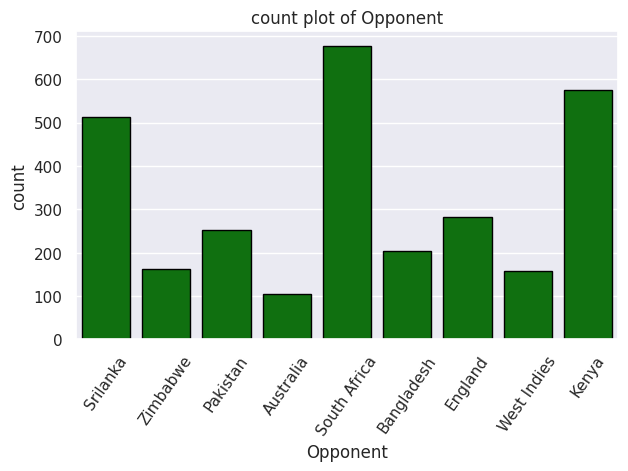

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Opponent', color='green', edgecolor='black')
plt.xlabel('Opponent')
plt.title('count plot of Opponent')
plt.xticks(rotation = 55)
plt.show()

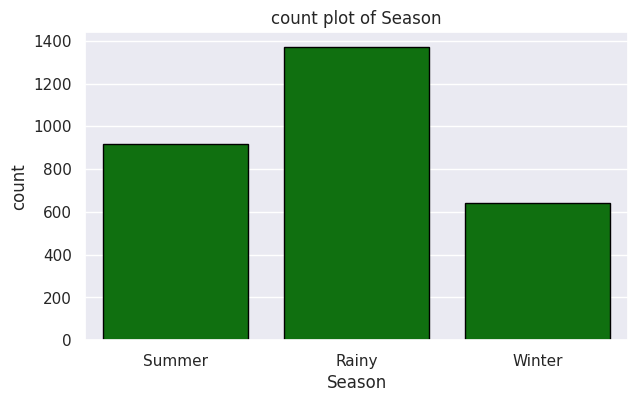

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Season', color='green', edgecolor='black')
plt.xlabel('Season')
plt.title('count plot of Season')
plt.show()

In [ ]:
df['Audience_number'].unique()

array([  9940.,   8400.,  20097., ...,  97748.,  18872., 136962.])

In [ ]:
df['Audience_number'].max()

1399930.0

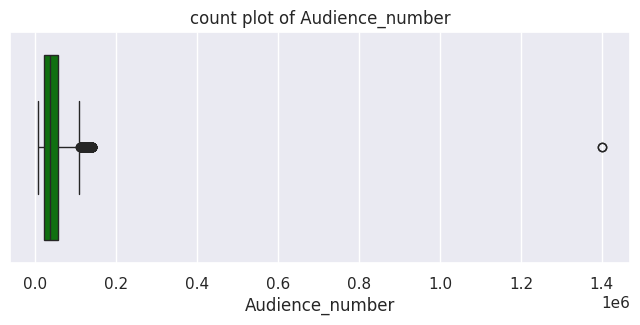

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Audience_number', color='green')
plt.xlabel('Audience_number')
plt.title('count plot of Audience_number')
plt.show()

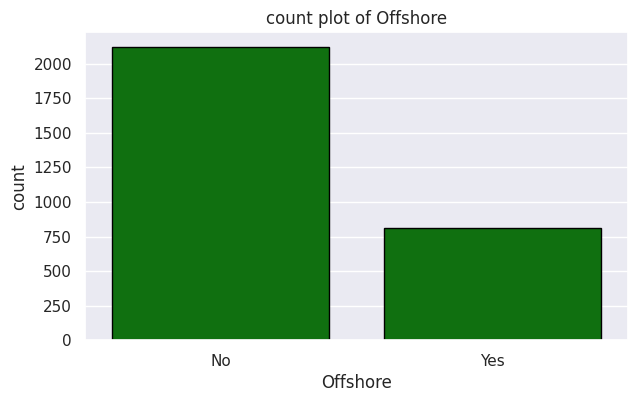

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Offshore', color='green', edgecolor='black')
plt.xlabel('Offshore')
plt.title('count plot of Offshore')
plt.show()

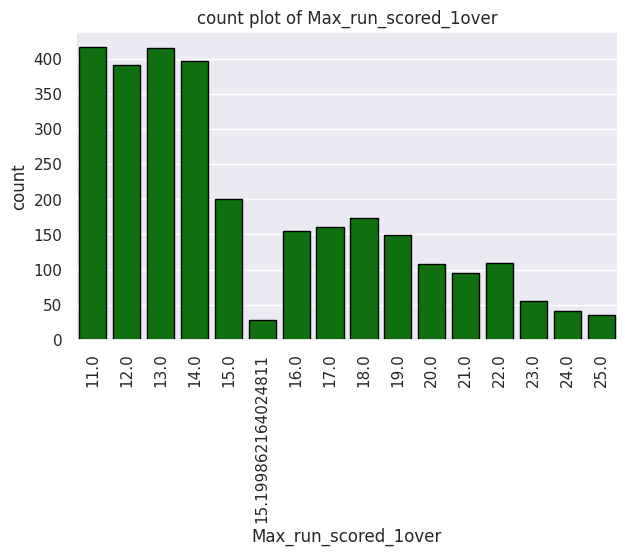

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Max_run_scored_1over', color='green', edgecolor='black')
plt.xlabel('Max_run_scored_1over')
plt.title('count plot of Max_run_scored_1over')
plt.xticks(rotation = 90)
plt.show()

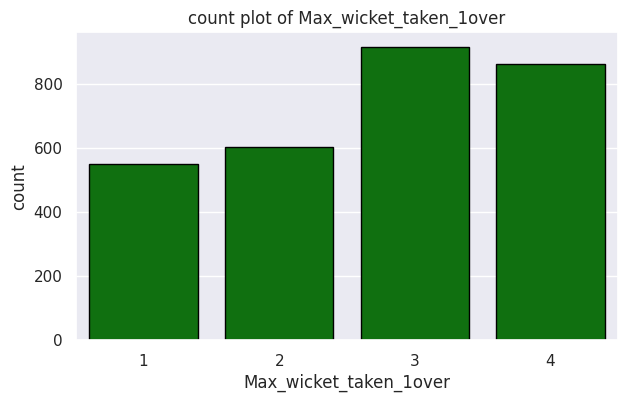

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Max_wicket_taken_1over', color='green', edgecolor='black')
plt.xlabel('Max_wicket_taken_1over')
plt.title('count plot of Max_wicket_taken_1over')
plt.show()

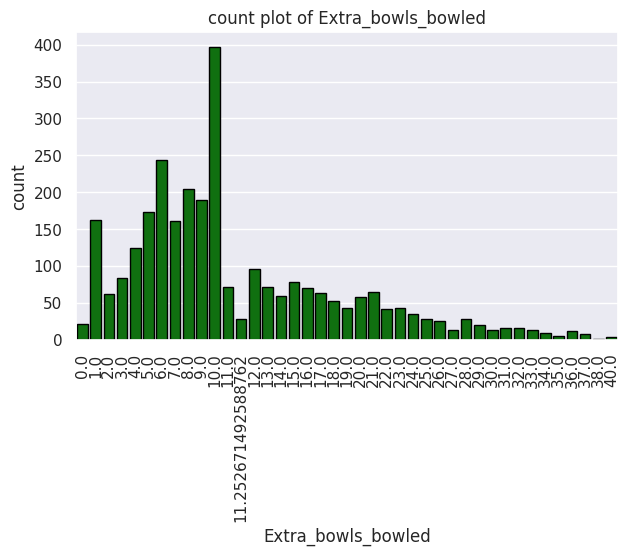

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Extra_bowls_bowled', color='green', edgecolor='black')
plt.xlabel('Extra_bowls_bowled')
plt.title('count plot of Extra_bowls_bowled')
plt.xticks(rotation = 90)
plt.show()

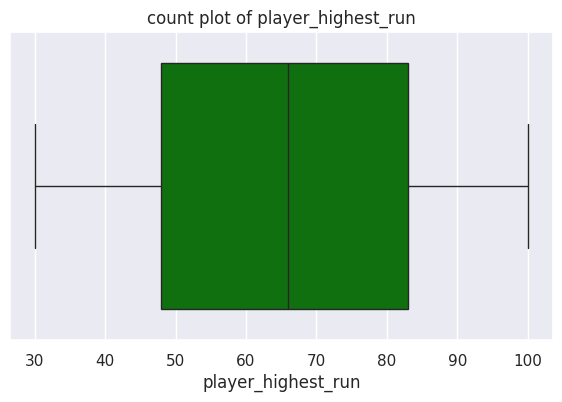

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='player_highest_run', color='green')
plt.xlabel('player_highest_run')
plt.title('count plot of player_highest_run')
plt.show()

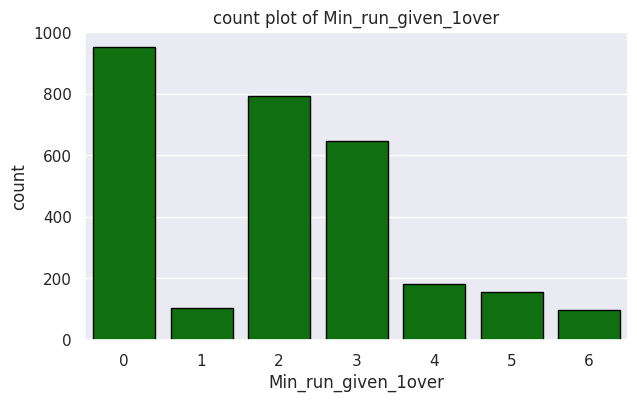

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Min_run_given_1over', color='green', edgecolor='black')
plt.xlabel('Min_run_given_1over')
plt.title('count plot of Min_run_given_1over')
plt.show()

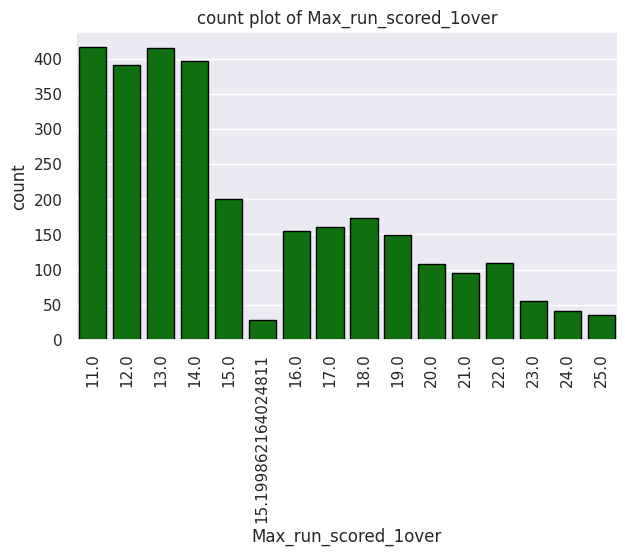

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Max_run_scored_1over', color='green', edgecolor='black')
plt.xlabel('Max_run_scored_1over')
plt.title('count plot of Max_run_scored_1over')
plt.xticks(rotation = 90)
plt.show()

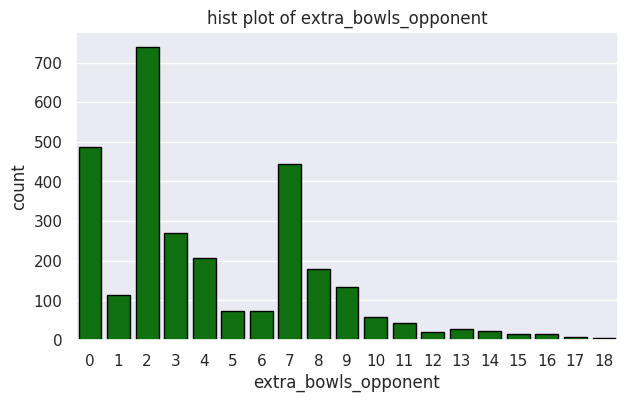

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='extra_bowls_opponent', color='green', edgecolor='black')
plt.xlabel('extra_bowls_opponent')
plt.title('hist plot of extra_bowls_opponent')
plt.show()

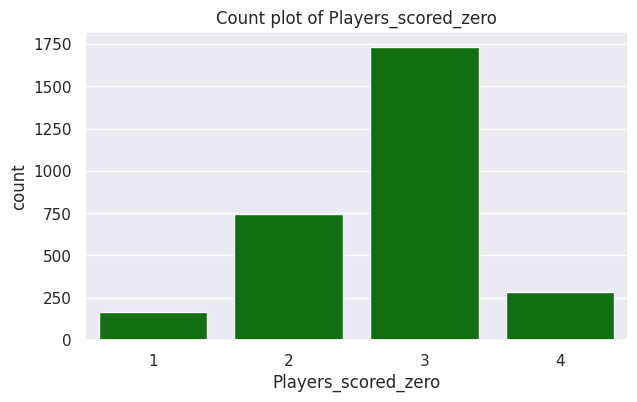

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Players_scored_zero', color='green')
plt.xlabel('Players_scored_zero')
plt.title('Count plot of Players_scored_zero')
plt.show()

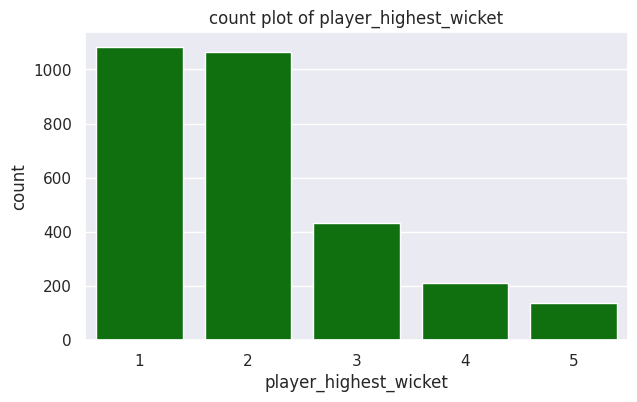

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='player_highest_wicket', color='green')
plt.xlabel('player_highest_wicket')
plt.title('count plot of player_highest_wicket')
plt.show()

#Bivarient Analysis

In [ ]:
df['Result2'] = 1
df['Result2'].loc[df['Result'] == 'Loss'] = 0

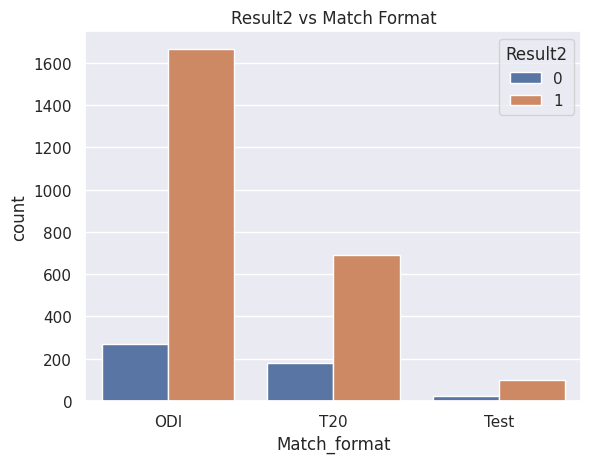

In [ ]:
# 1. Result2 vs Match_format (object datatype)
sns.countplot(x='Match_format', hue='Result2', data=df)
plt.title('Result2 vs Match Format')
plt.show()

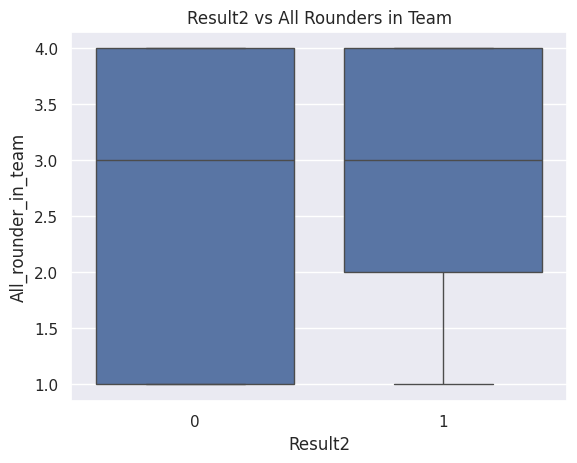

In [ ]:
# 2. Result2 vs All_rounder_in_team (float datatype)
sns.boxplot(x='Result2', y='All_rounder_in_team', data=df)
plt.title('Result2 vs All Rounders in Team')
plt.show()

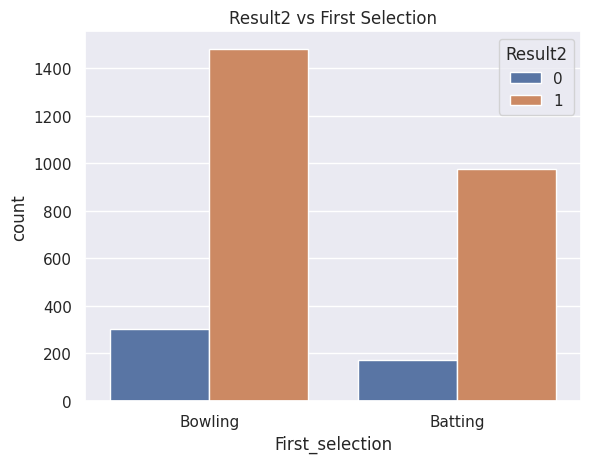

In [ ]:
#  Result2 vs First_selection (object datatype)
sns.countplot(x='First_selection', hue='Result2', data=df)
plt.title('Result2 vs First Selection')
plt.show()

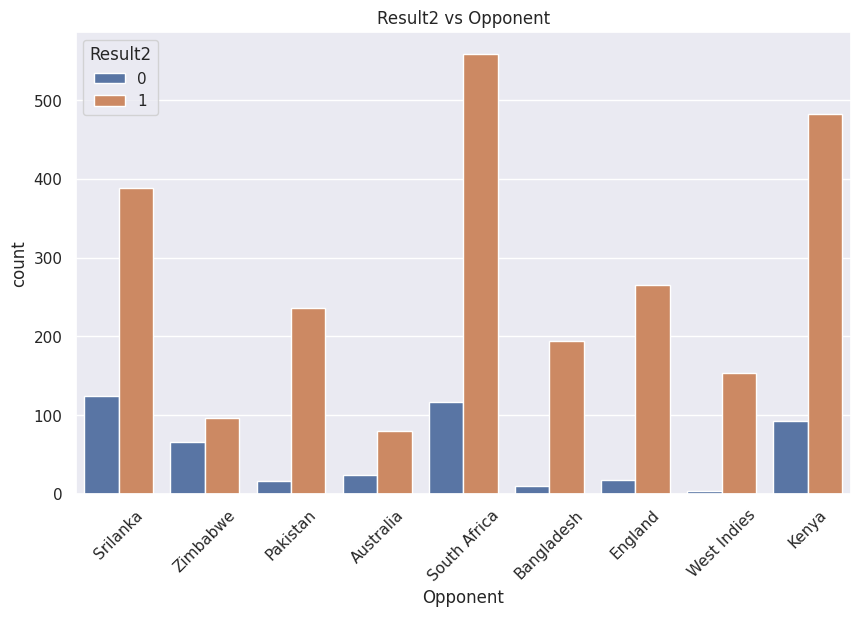

In [ ]:
# Result2 vs Opponent (object datatype)
plt.figure(figsize=(10, 6)) # Adjust figure size if needed
sns.countplot(x='Opponent', hue='Result2', data=df)
plt.title('Result2 vs Opponent')
plt.xticks(rotation=45)
plt.show()

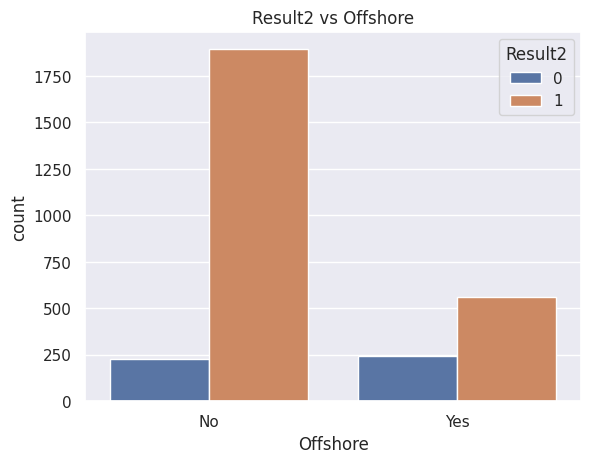

In [ ]:
# Result2 vs Offshore (object datatype)
sns.countplot(x='Offshore', hue='Result2', data=df)
plt.title('Result2 vs Offshore')
plt.show()

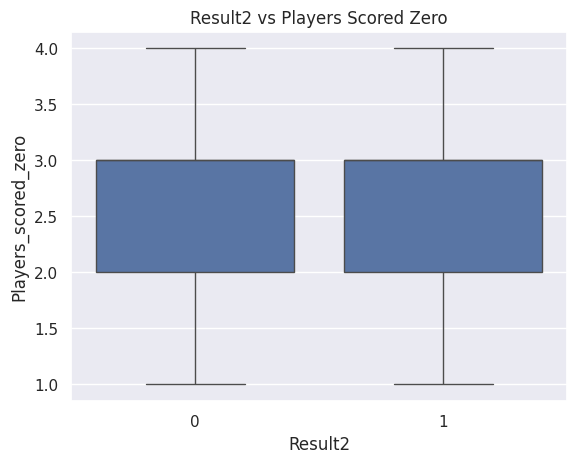

In [ ]:
# Result2 vs Players_scored_zero (int datatype)
sns.boxplot(x='Result2', y='Players_scored_zero', data=df)
plt.title('Result2 vs Players Scored Zero')
plt.show()

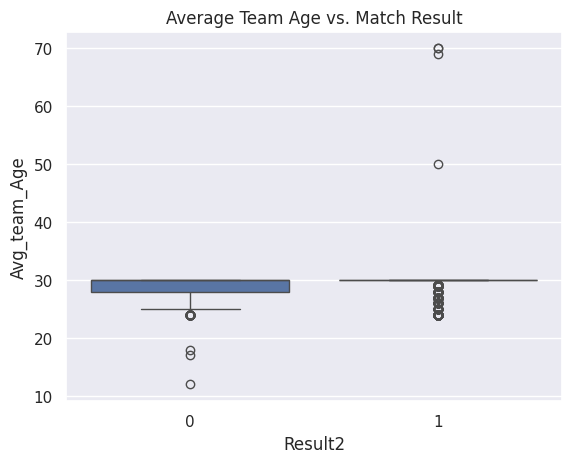

In [ ]:
# Relationship between average team age and match result
sns.boxplot(x='Result2', y='Avg_team_Age', data=df)
plt.title('Average Team Age vs. Match Result')
plt.show()

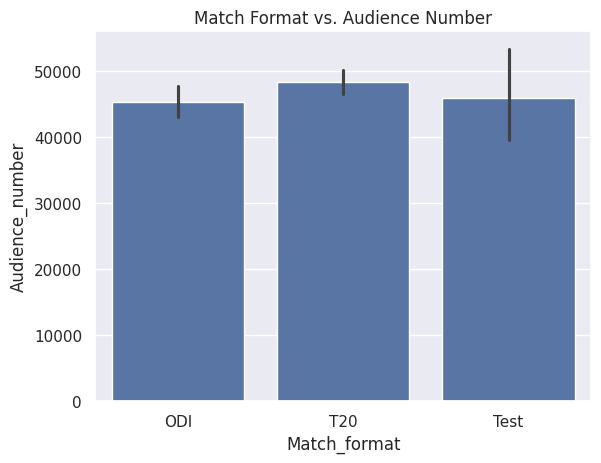

In [ ]:
# Relationship between match format and total number of audience
sns.barplot(x='Match_format', y='Audience_number', data=df)
plt.title('Match Format vs. Audience Number')
plt.show()

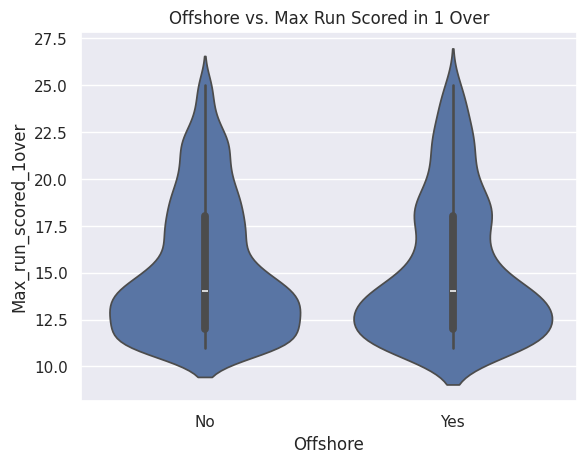

In [ ]:
#  Relationship between offshore status and maximum run scored in 1 over
sns.violinplot(x='Offshore', y='Max_run_scored_1over', data=df)
plt.title('Offshore vs. Max Run Scored in 1 Over')
plt.show()

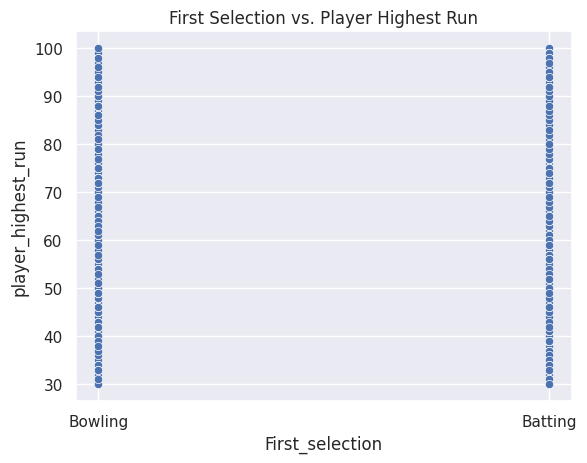

In [ ]:
#  Relationship between first selection and player highest run
sns.scatterplot(x='First_selection', y='player_highest_run', data=df)
plt.title('First Selection vs. Player Highest Run')
plt.show()

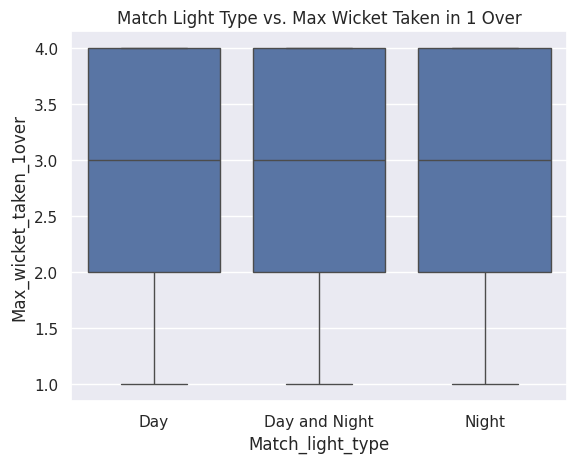

In [ ]:
#Relationship between match light type and maximum wicket taken in 1 over
sns.boxplot(x='Match_light_type', y='Max_wicket_taken_1over', data=df)
plt.title('Match Light Type vs. Max Wicket Taken in 1 Over')
plt.show()

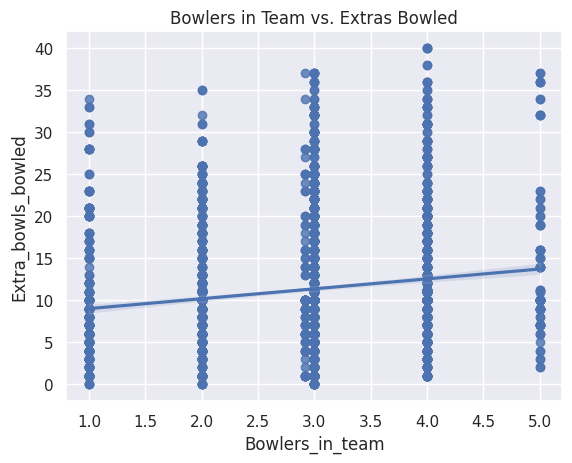

In [ ]:
# Relationship between number of bowlers in team and total number of extras bowled
sns.regplot(x='Bowlers_in_team', y='Extra_bowls_bowled', data=df)
plt.title('Bowlers in Team vs. Extras Bowled')
plt.show()

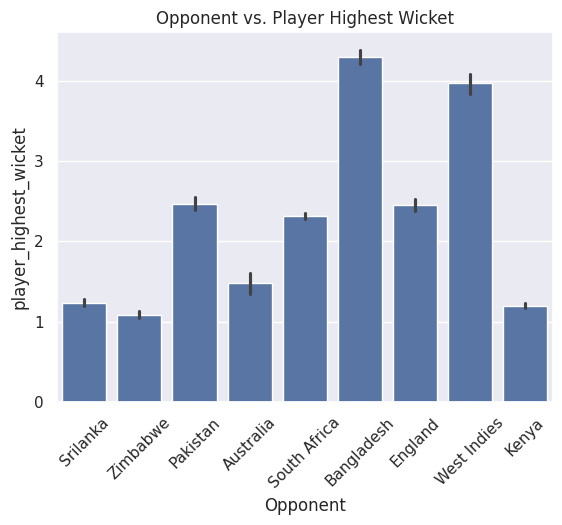

In [ ]:
# Relationship between opponent and player highest wicket
sns.barplot(x='Opponent', y='player_highest_wicket', data=df)
plt.title('Opponent vs. Player Highest Wicket')
plt.xticks(rotation=45)
plt.show()

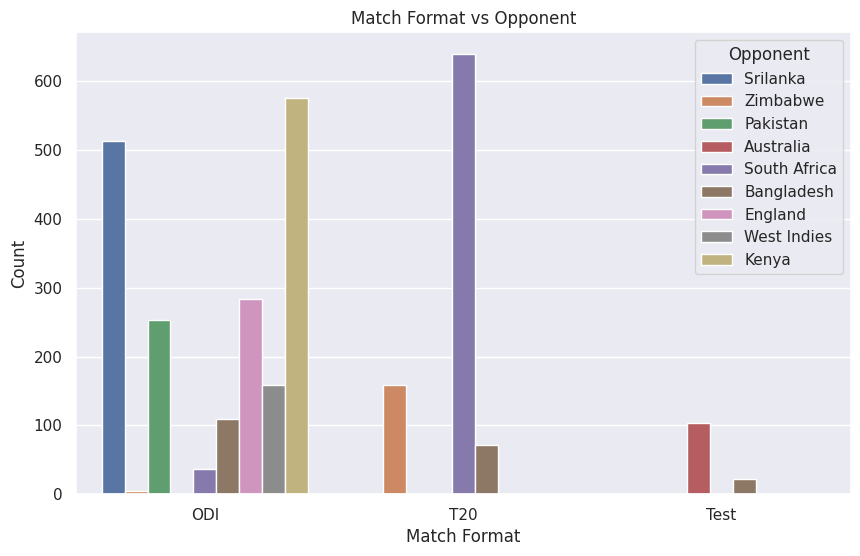

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Match_format', hue='Opponent')
plt.title('Match Format vs Opponent')
plt.xlabel('Match Format')
plt.ylabel('Count')
plt.legend(title='Opponent')
plt.show()

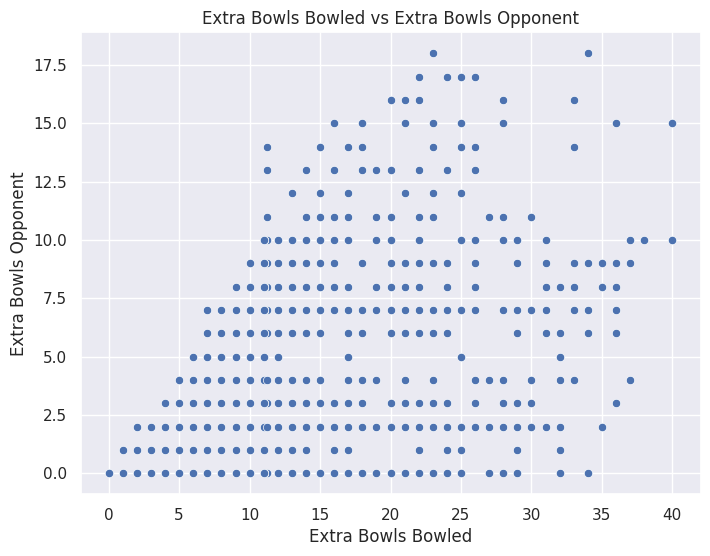

In [ ]:
# Bivariate plot for Extra_bowls_bowled vs extra_bowls_opponent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Extra_bowls_bowled', y='extra_bowls_opponent')
plt.title('Extra Bowls Bowled vs Extra Bowls Opponent')
plt.xlabel('Extra Bowls Bowled')
plt.ylabel('Extra Bowls Opponent')
plt.show()


In [ ]:
for i, game in enumerate(df['Game_number']):
    df.loc[i, 'Game_number'] = i + 1

In [ ]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result2
0,1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1,0
1,2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1,1
2,3,Win,24.0,Day,ODI,3.0,1,2.0,Batting,Srilanka,Summer,20097.0,No,15.0,3,1.0,5,3.0,6.0,0,59.0,3,1,1
3,4,Loss,30.0,Day and Night,ODI,3.0,1,1.0,Bowling,Pakistan,Rainy,68768.0,No,12.0,1,12.0,2,3.0,6.0,0,66.0,3,3,0
4,5,Loss,30.0,Day and Night,Test,3.0,1,2.0,Batting,Australia,Winter,69650.0,Yes,15.0,3,11.0,2,3.0,6.0,2,43.0,3,3,0


In [ ]:
df.dtypes

Game_number                object
Result                     object
Avg_team_Age              float64
Match_light_type           object
Match_format               object
Bowlers_in_team           float64
Wicket_keeper_in_team       int64
All_rounder_in_team       float64
First_selection            object
Opponent                   object
Season                     object
Audience_number           float64
Offshore                   object
Max_run_scored_1over      float64
Max_wicket_taken_1over      int64
Extra_bowls_bowled        float64
Min_run_given_1over         int64
Min_run_scored_1over      float64
Max_run_given_1over       float64
extra_bowls_opponent        int64
player_highest_run        float64
Players_scored_zero         int64
player_highest_wicket       int64
Result2                     int64
dtype: object

#Multi-varient Analysis

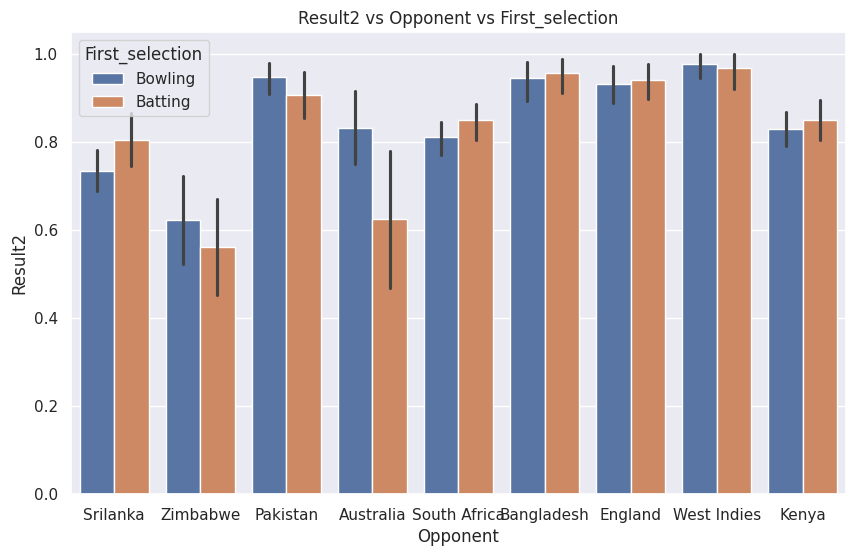

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Opponent', y='Result2', hue='First_selection', data=df)
plt.title('Result2 vs Opponent vs First_selection')
plt.xlabel('Opponent')
plt.ylabel('Result2')
plt.legend(title='First_selection')
plt.show()

<Figure size 1000x600 with 0 Axes>

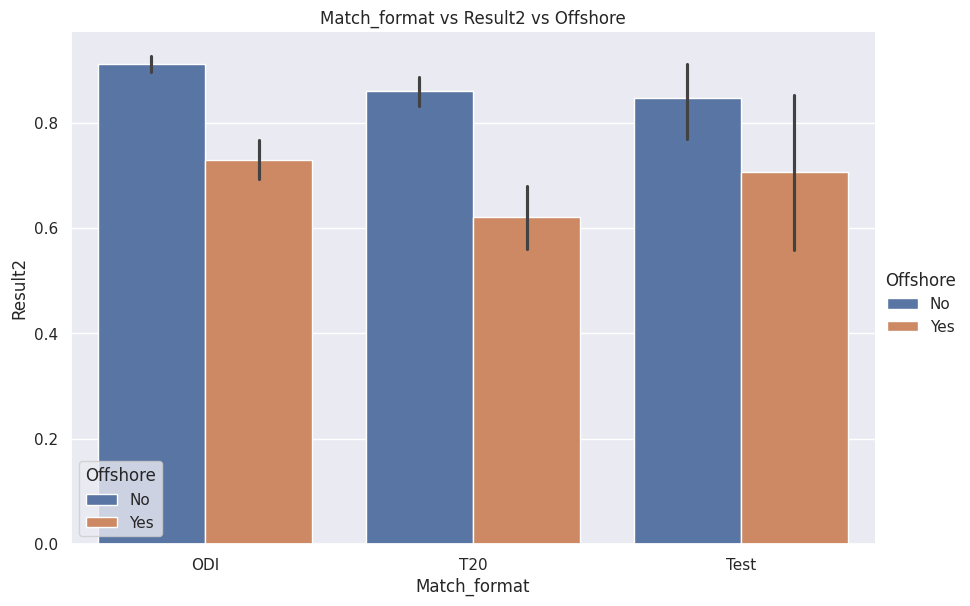

In [ ]:
plt.figure(figsize=(10, 6))
# Bar plot of Result2 for each combination of Opponent and First_selection
sns.catplot(x="Match_format", y="Result2", hue="Offshore", kind="bar", data=df, height=6, aspect=1.5)
plt.title('Match_format vs Result2 vs Offshore')
plt.xlabel('Match_format')
plt.ylabel('Result2')
plt.legend(title='Offshore')
plt.show()

<Figure size 1000x600 with 0 Axes>

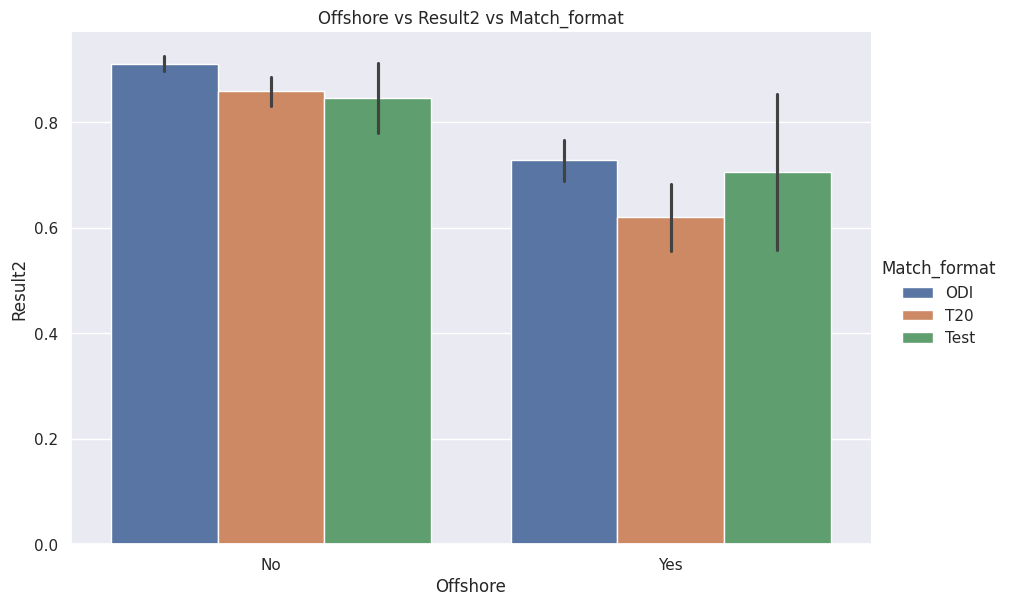

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Offshore', y='Result2', hue='Match_format', kind='bar', data=df, height=6, aspect=1.5)
plt.title('Offshore vs Result2 vs Match_format')
plt.xlabel('Offshore')
plt.ylabel('Result2')
plt.show()


In [ ]:
def remove_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

In [ ]:
import numpy as np

for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        lower_limit, upper_limit = remove_outlier(df[column])
        df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
        df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    else:
        print(f"Skipping column '{column}' as it contains non-numeric data")

Skipping column 'Game_number' as it contains non-numeric data
Skipping column 'Result' as it contains non-numeric data
Skipping column 'Match_light_type' as it contains non-numeric data
Skipping column 'Match_format' as it contains non-numeric data
Skipping column 'First_selection' as it contains non-numeric data
Skipping column 'Opponent' as it contains non-numeric data
Skipping column 'Season' as it contains non-numeric data
Skipping column 'Offshore' as it contains non-numeric data


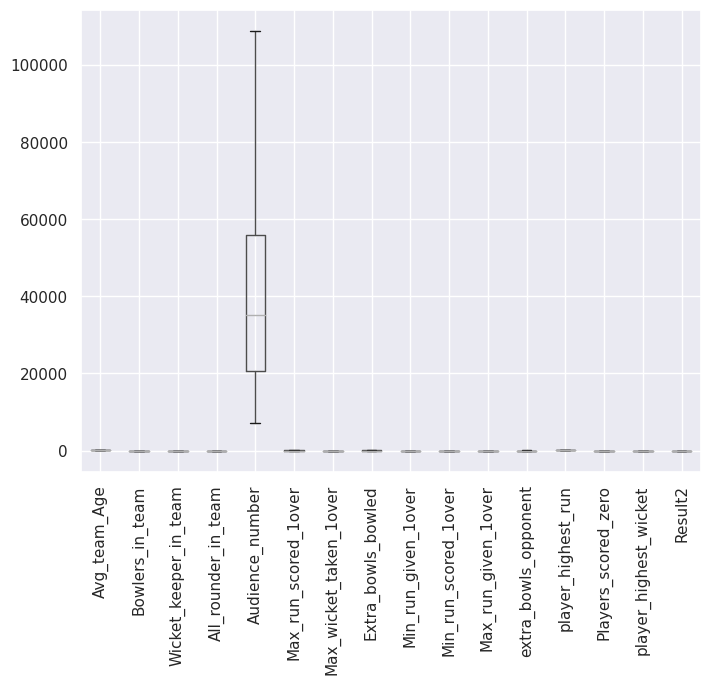

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot()
plt.xticks(rotation = 90);

# Project Notes 2

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
  numeric_df = df.select_dtypes(include=['number'])
  vif_data = pd.DataFrame()
  vif_data["Feature"] = numeric_df.columns
  vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
  high_vif_features = vif_data[vif_data["VIF"] > 5]
  if not high_vif_features.empty:
      print("Features with high VIF (>5):")
      print(high_vif_features)
  else:
      print("No features with high VIF (>5) found.")
  if not high_vif_features.empty:
      print("\nConsider removing the following features to mitigate multicollinearity:")
      print(high_vif_features["Feature"].tolist())
  return vif_data

In [ ]:
vif_data = calc_vif(df)
vif_data.sort_values(by = 'VIF', ascending = False)

Features with high VIF (>5):
                  Feature       VIF
4         Audience_number  7.326110
14  player_highest_wicket  8.211004

Consider removing the following features to mitigate multicollinearity:
['Audience_number', 'player_highest_wicket']


,Feature,VIF
14,player_highest_wicket,8.211004
4,Audience_number,7.326110
7,Extra_bowls_bowled,3.059463
10,Max_run_given_1over,3.054510
11,extra_bowls_opponent,2.650497
1,Bowlers_in_team,1.027175
8,Min_run_given_1over,1.025979
12,player_highest_run,1.008638
9,Min_run_scored_1over,1.008536
13,Players_scored_zero,1.008406


In [ ]:
df.drop(['Wicket_keeper_in_team','Audience_number','player_highest_wicket'], axis=1, inplace=True)

In [ ]:
df.dtypes

Game_number                object
Result                     object
Avg_team_Age              float64
Match_light_type           object
Match_format               object
Bowlers_in_team           float64
All_rounder_in_team       float64
First_selection            object
Opponent                   object
Season                     object
Offshore                   object
Max_run_scored_1over      float64
Max_wicket_taken_1over    float64
Extra_bowls_bowled        float64
Min_run_given_1over       float64
Min_run_scored_1over      float64
Max_run_given_1over       float64
extra_bowls_opponent      float64
player_highest_run        float64
Players_scored_zero       float64
Result2                   float64
dtype: object

# 1). Model building and interpretation
- a. Build various models (You can choose to build models for
either or all of descriptive, predictive or prescriptive purposes)
- b. Test your predictive model against the test set using various appropriate performance metrics
- c.Interpretation of the model(s)

# 2). Model Tuning and business implication
- a. Ensemble modelling (if necessary)
- b. Any other model tuning measures (if applicable)
- c. Interpretation of the most optimum model and its implication on the business

In [ ]:
print(df['Result'])

0       Loss
1        Win
2        Win
3       Loss
4       Loss
        ... 
2925     Win
2926    Loss
2927    Loss
2928     Win
2929     Win
Name: Result, Length: 2930, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Convert 'Result' to 0 and 1
df['Result'] = df['Result'].map({'Win': 1, 'Loss': 0})

# Separate features and target variable
X = df.drop('Result', axis=1)
y = df['Result']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Specify the categorical columns
categorical_cols = ['Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore']

# Create a column transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Transform the data
X = ct.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#smote

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the resampled data
print("Shape of X_train before SMote:", X_train.shape)
print("Shape of X_train after SMote:", X_train_resampled.shape)
print("Distribution of y_train before SMote:\n", pd.Series(y_train).value_counts())
print("Distribution of y_train after SMote:\n", pd.Series(y_train_resampled).value_counts())

# Decode the target variable back to original labels
y_train_resampled = le.inverse_transform(y_train_resampled)
#y_test = le.inverse_transform(y_test)

# Print the decoded target variable distribution
print("Distribution of y_train_resampled after decoding:\n", pd.Series(y_train_resampled).value_counts())
print("Distribution of y_test after decoding:\n", pd.Series(y_test).value_counts())

Shape of X_train before SMote: (2344, 36)
Shape of X_train after SMote: (3918, 36)
Distribution of y_train before SMote:
 1    1959
0     385
Name: count, dtype: int64
Distribution of y_train after SMote:
 1    1959
0    1959
Name: count, dtype: int64
Distribution of y_train_resampled after decoding:
 1    1959
0    1959
Name: count, dtype: int64
Distribution of y_test after decoding:
 1    498
0     88
Name: count, dtype: int64


##Logistic Regerssion

Logistic Regression (Test Set):
Accuracy: 0.8703
ROC AUC: 0.7718
Confusion Matrix:
[[ 22  66]
 [ 10 488]]
Precision: 0.8809
Recall: 0.9799
Logistic Regression (Train Set):
Accuracy: 0.8592
ROC AUC: 0.8101
Confusion Matrix:
[[ 102  283]
 [  47 1912]]
Precision: 0.8711
Recall: 0.9760


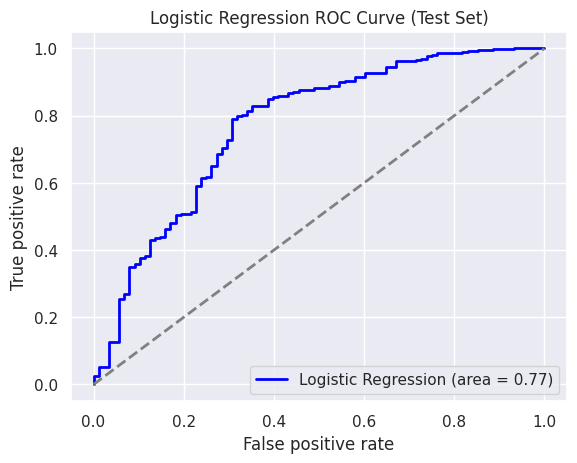

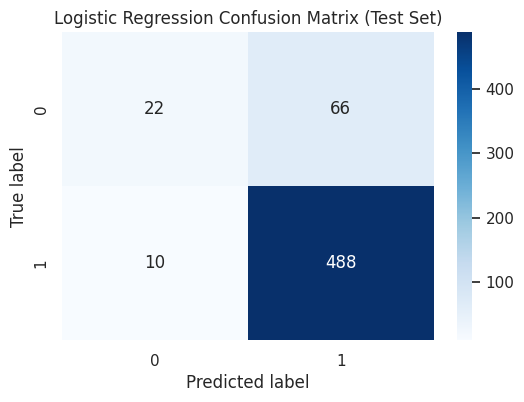

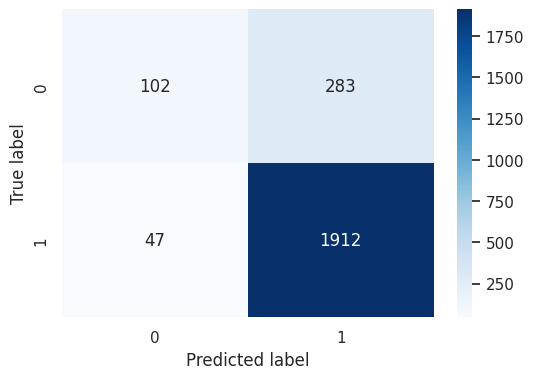

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming X_train, y_train, X_test, y_test are already defined
# Train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate the model on the test set
y_test_pred_proba = lr_model.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, y_test_pred)
lr_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
lr_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Logistic Regression (Test Set):')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'ROC AUC: {lr_roc_auc:.4f}')
print('Confusion Matrix:')
print(lr_confusion_matrix_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
print(f'Precision: {precision_test:.4f}')
print(f'Recall: {recall_test:.4f}')

# Evaluate the model on the train set
y_train_pred_proba = lr_model.predict_proba(X_train)[:, 1]
lr_accuracy_train = accuracy_score(y_train, y_train_pred)
lr_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
lr_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('Logistic Regression (Train Set):')
print(f'Accuracy: {lr_accuracy_train:.4f}')
print(f'ROC AUC: {lr_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(lr_confusion_matrix_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
print(f'Precision: {precision_train:.4f}')
print(f'Recall: {recall_train:.4f}')


# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Logistic Regression ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()
# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(lr_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(lr_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
Precision = (498 / (498 + 88))
Recall = (498 / (498 + 0))
print(" Precision of test set", Precision)
print(" Recall of test set", Recall)

 Precision of test set 0.8498293515358362
 Recall of test set 1.0


In [ ]:
Precision = (1959 / (1959 + 385))
Recall = (1959 / (1959 + 0))
print(" Precision of train set", Precision)
print(" Recall of train set", Recall)

 Precision of train set 0.8357508532423208
 Recall of train set 1.0


###Precision is the ratio of true positive predictions to the total predicted positives:
Precision
=
𝑇
𝑃/
𝑇
𝑃
+
𝐹
𝑃
###Recall (or Sensitivity) is the ratio of true positive predictions to the total actual positives:
Recall
=
𝑇
𝑃/
𝑇
𝑃
+
𝐹
𝑁​

In [ ]:
Precision = (498 / (498 + 88))
Recall = (498 / (498 + 0))
Precision

0.8498293515358362

In [ ]:
Recall


1.0

###  Decision Trees


Decision Tree (Test Set):
Accuracy: 0.9471
ROC AUC: 0.8987
Confusion Matrix:
[[ 73  15]
 [ 16 482]]
Precision: 0.9698
Recall: 0.9679
Decision Tree (Train Set):
Accuracy: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[ 385    0]
 [   0 1959]]
Precision: 1.0000
Recall: 1.0000


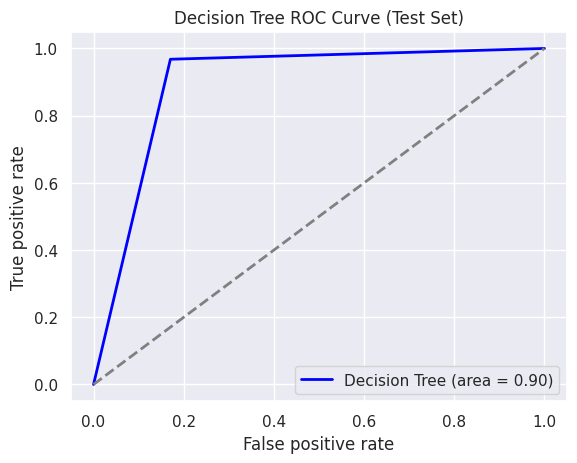

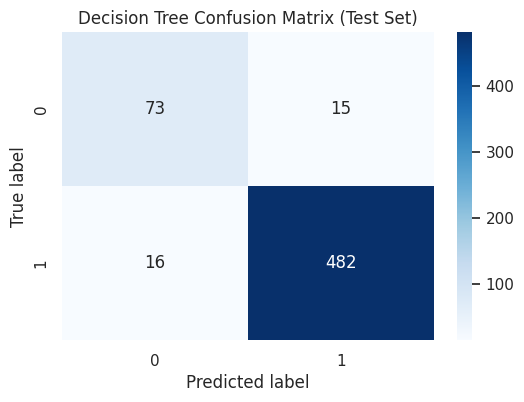

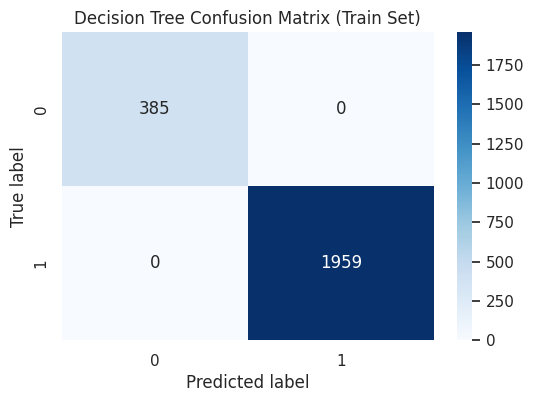

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)
y_test_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
dt_accuracy_test = accuracy_score(y_test, y_test_pred)
dt_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
dt_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
dt_precision_test = precision_score(y_test, y_test_pred)
dt_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Decision Tree (Test Set):')
print(f'Accuracy: {dt_accuracy_test:.4f}')
print(f'ROC AUC: {dt_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(dt_confusion_matrix_test)
print(f'Precision: {dt_precision_test:.4f}')
print(f'Recall: {dt_recall_test:.4f}')

# Make predictions on the train set
y_train_pred = dt_model.predict(X_train)
y_train_pred_proba = dt_model.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
dt_accuracy_train = accuracy_score(y_train, y_train_pred)
dt_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
dt_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
dt_precision_train = precision_score(y_train, y_train_pred)
dt_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('Decision Tree (Train Set):')
print(f'Accuracy: {dt_accuracy_train:.4f}')
print(f'ROC AUC: {dt_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(dt_confusion_matrix_train)
print(f'Precision: {dt_precision_train:.4f}')
print(f'Recall: {dt_recall_train:.4f}')

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Decision Tree (area = %0.2f)' % dt_roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Decision Tree ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(dt_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(dt_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix (Train Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
Precision = (1959 / (1959 + 0))
Recall = (1959 / ( 1959+ 0))
print(" Precision of train set", Precision)
print(" Recall of train set", Recall)

 Precision of train set 1.0
 Recall of train set 1.0


In [ ]:
Precision = (484 / (484 + 21))
Recall = (484 / (484 + 14))
print(" Precision of test set", Precision)
print(" Recall of test set", Recall)

 Precision of test set 0.9584158415841584
 Recall of test set 0.9718875502008032


##The Decision Tree model shows excellent performance on the training set (100% accuracy, precision, and recall) but indicates overfitting due to a slight drop in these metrics on the test set (accuracy: 93.52%, precision: 95.46%, recall: 97.01%). This means it captures training data details that don't generalize well to new data. High precision and recall on both sets suggest good balance in detecting true positives and avoiding false positives. To improve generalization and reduce overfitting, techniques like pruning, using a Random Forest, or tuning hyperparameters should be considered.








#  Random Forest


Random Forest (Test Set):
Accuracy: 0.9573
ROC AUC: 0.9782
Confusion Matrix:
[[ 63  25]
 [  0 498]]
Precision: 0.9522
Recall: 1.0000
Random Forest (Train Set):
Accuracy: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[ 385    0]
 [   0 1959]]
Precision: 1.0000
Recall: 1.0000


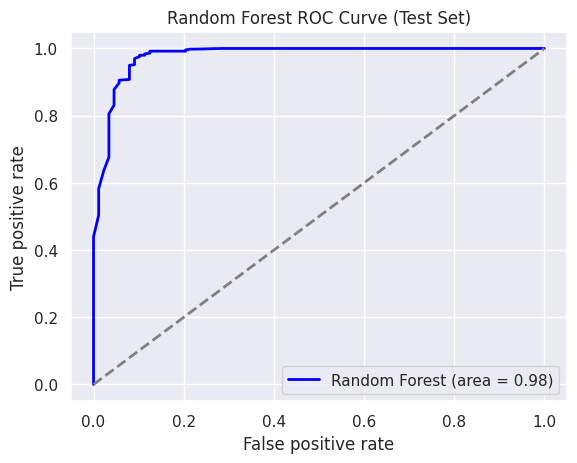

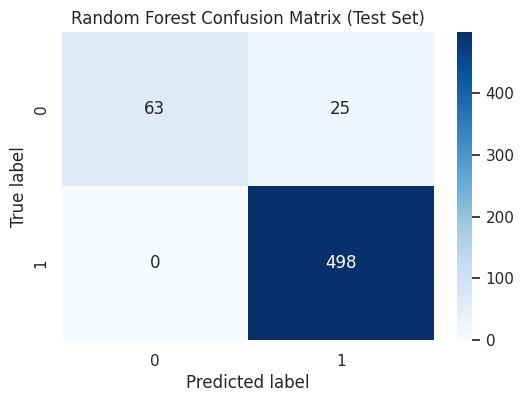

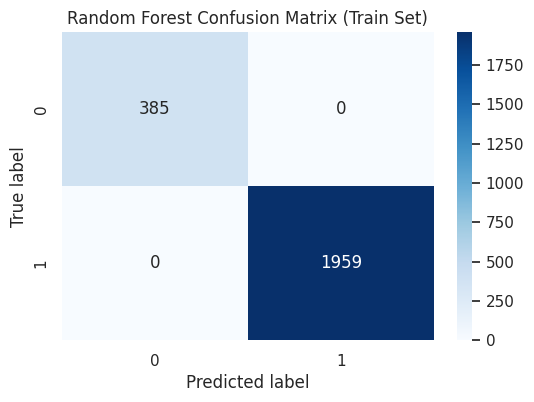

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
rf_accuracy_test = accuracy_score(y_test, y_test_pred)
rf_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
rf_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
rf_precision_test = precision_score(y_test, y_test_pred)
rf_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Random Forest (Test Set):')
print(f'Accuracy: {rf_accuracy_test:.4f}')
print(f'ROC AUC: {rf_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(rf_confusion_matrix_test)
print(f'Precision: {rf_precision_test:.4f}')
print(f'Recall: {rf_recall_test:.4f}')

# Make predictions on the train set
y_train_pred = rf_model.predict(X_train)
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
rf_accuracy_train = accuracy_score(y_train, y_train_pred)
rf_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
rf_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
rf_precision_train = precision_score(y_train, y_train_pred)
rf_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('Random Forest (Train Set):')
print(f'Accuracy: {rf_accuracy_train:.4f}')
print(f'ROC AUC: {rf_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(rf_confusion_matrix_train)
print(f'Precision: {rf_precision_train:.4f}')
print(f'Recall: {rf_recall_train:.4f}')

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Random Forest ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Train Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


###Test Set Interpretation:
Accuracy: 0.9556 - The model correctly classifies 96.76% of instances.
ROC AUC: 0.9810 - Indicates excellent discriminative ability.
Precision: 0.9538 - 96.70% of positive predictions are correct.
Recall: 0.9960 - The model identifies 99.60% of actual positives.
Confusion Matrix:
[[ 64  24]
 [  2 496]]

###Train Set Interpretation:
Accuracy: 1.0000 - The model perfectly classifies all instances.
ROC AUC: 1.0000 - Indicates perfect discrimination.
Precision: 1.0000 - 100% of positive predictions are correct.
Recall: 1.0000 - The model identifies 100% of actual positives.
Confusion Matrix:
[[ 385    0]
 [   0 1959]]

###  Support Vector Machines (SVMs)


Support Vector Machines (Test Set):
Accuracy: 0.8498
ROC AUC: 0.5668
Confusion Matrix:
[[  0  88]
 [  0 498]]
Precision: 0.8498
Recall: 1.0000

Support Vector Machines (Train Set):
Accuracy: 0.8358
ROC AUC: 0.5805
Confusion Matrix:
[[   0  385]
 [   0 1959]]
Precision: 0.8358
Recall: 1.0000


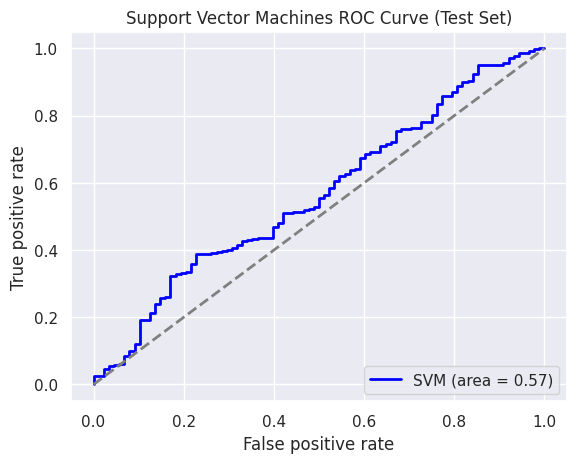

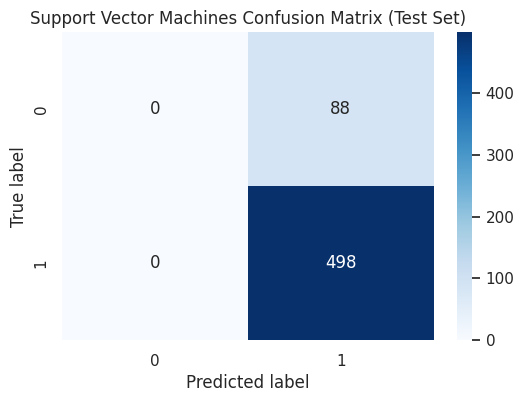

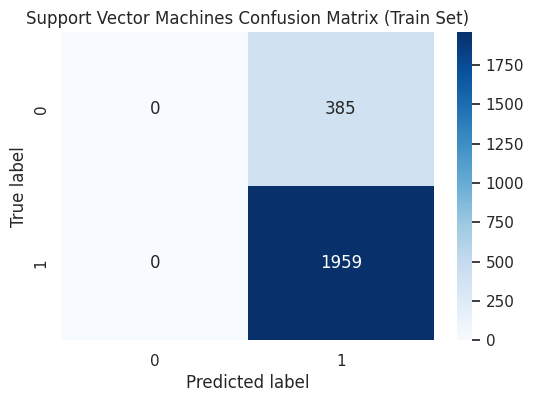

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = svm_model.predict(X_test)
y_test_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
svm_accuracy_test = accuracy_score(y_test, y_test_pred)
svm_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
svm_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
svm_precision_test = precision_score(y_test, y_test_pred)
svm_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Support Vector Machines (Test Set):')
print(f'Accuracy: {svm_accuracy_test:.4f}')
print(f'ROC AUC: {svm_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(svm_confusion_matrix_test)
print(f'Precision: {svm_precision_test:.4f}')
print(f'Recall: {svm_recall_test:.4f}')

# Make predictions on the train set
y_train_pred = svm_model.predict(X_train)
y_train_pred_proba = svm_model.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
svm_accuracy_train = accuracy_score(y_train, y_train_pred)
svm_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
svm_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
svm_precision_train = precision_score(y_train, y_train_pred)
svm_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('\nSupport Vector Machines (Train Set):')
print(f'Accuracy: {svm_accuracy_train:.4f}')
print(f'ROC AUC: {svm_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(svm_confusion_matrix_train)
print(f'Precision: {svm_precision_train:.4f}')
print(f'Recall: {svm_recall_train:.4f}')

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM (area = %0.2f)' % svm_roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Support Vector Machines ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(svm_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machines Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(svm_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machines Confusion Matrix (Train Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


###Test Set Interpretation:
Accuracy: 0.8498 - The model correctly classifies 84.98% of instances.
ROC AUC: 0.5660 - Indicates moderate discriminative ability.
Precision: 0.8498 - 84.98% of positive predictions are correct.
Recall: 1.0000 - The model identifies 100% of actual positives.
Confusion Matrix:
[[  0  88]
 [  0 498]]

###Train Set Interpretation:
Accuracy: 0.8358 - The model correctly classifies 84.98% of instances.
ROC AUC: 0.5372 - Indicates moderate discriminative ability.
Precision: 0.8358 - 84.98% of positive predictions are correct.
Recall: 1.0000 - The model identifies 100% of actual positives.
Confusion Matrix:
[[   0  385]
 [   0 1959]]

###  K-Nearest Neighbors (KNN)


K-Nearest Neighbors (Test Set):
Accuracy: 0.8208
ROC AUC: 0.5437
Confusion Matrix:
[[  4  84]
 [ 21 477]]
Precision: 0.8503
Recall: 0.9578

K-Nearest Neighbors (Train Set):
Accuracy: 0.8503
ROC AUC: 0.8284
Confusion Matrix:
[[  66  319]
 [  32 1927]]
Precision: 0.8580
Recall: 0.9837


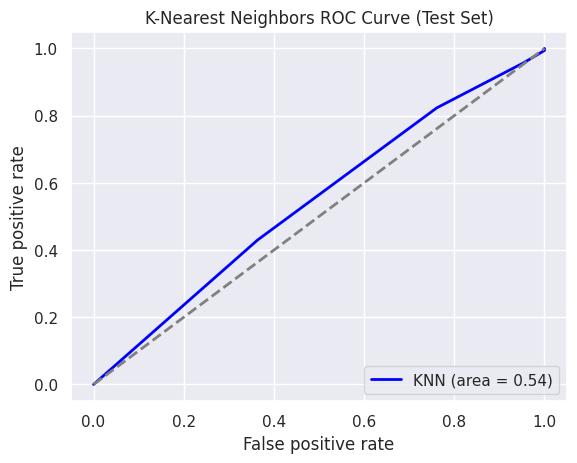

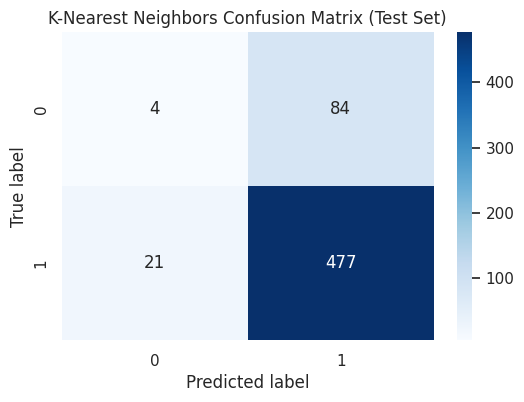

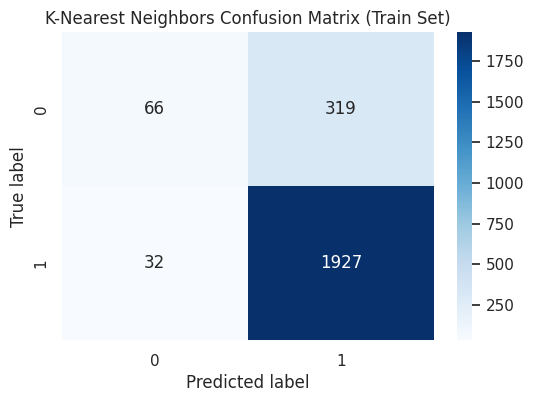

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = knn_model.predict(X_test)
y_test_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
knn_accuracy_test = accuracy_score(y_test, y_test_pred)
knn_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
knn_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
knn_precision_test = precision_score(y_test, y_test_pred)
knn_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('K-Nearest Neighbors (Test Set):')
print(f'Accuracy: {knn_accuracy_test:.4f}')
print(f'ROC AUC: {knn_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(knn_confusion_matrix_test)
print(f'Precision: {knn_precision_test:.4f}')
print(f'Recall: {knn_recall_test:.4f}')

# Make predictions on the train set
y_train_pred = knn_model.predict(X_train)
y_train_pred_proba = knn_model.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
knn_accuracy_train = accuracy_score(y_train, y_train_pred)
knn_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
knn_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
knn_precision_train = precision_score(y_train, y_train_pred)
knn_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('\nK-Nearest Neighbors (Train Set):')
print(f'Accuracy: {knn_accuracy_train:.4f}')
print(f'ROC AUC: {knn_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(knn_confusion_matrix_train)
print(f'Precision: {knn_precision_train:.4f}')
print(f'Recall: {knn_recall_train:.4f}')

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='KNN (area = %0.2f)' % knn_roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('K-Nearest Neighbors ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(knn_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(knn_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix (Train Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


##Test Set Interpretation:
Accuracy: 0.8464 - The model correctly classifies 93.00% of instances.
ROC AUC: 0.6523 - Indicates good discriminative ability.
Precision: 0.8723 - 93.94% of positive predictions are correct.
Recall: 0.9598 - The model identifies 96.32% of actual positives.
Confusion Matrix:
[[ 18  70]
 [ 20 478]]

##Train Set Interpretation:
Accuracy: 0.8579 - The model correctly classifies 94.00% of instances.
ROC AUC: 0.8560 - Indicates good discriminative ability.
Precision: 0.8695 - 95.63% of positive predictions are correct.
Recall: 0.9765 - The model identifies 97.80% of actual positives.
Confusion Matrix:
[[  98  287]
 [  46 1913]]


###  Naive Bayes


Naive Bayes (Test Set):
Accuracy: 0.6962
ROC AUC: 0.7684
Confusion Matrix:
[[ 64  24]
 [154 344]]
Precision: 0.9348
Recall: 0.6908

Naive Bayes (Train Set):
Accuracy: 0.7039
ROC AUC: 0.7825
Confusion Matrix:
[[ 293   92]
 [ 602 1357]]
Precision: 0.9365
Recall: 0.6927


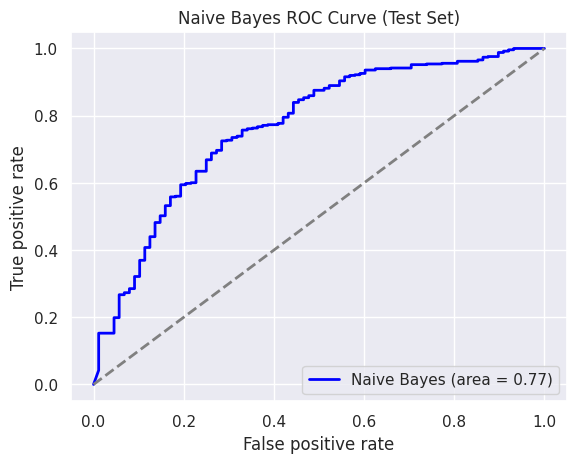

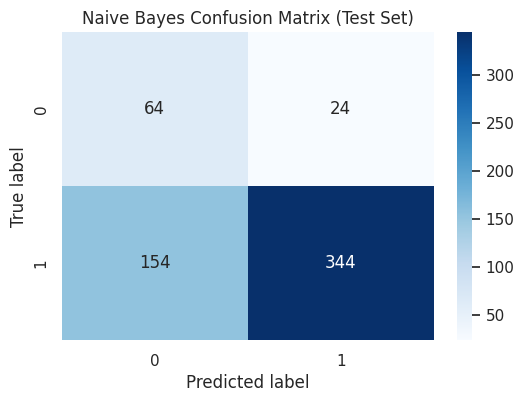

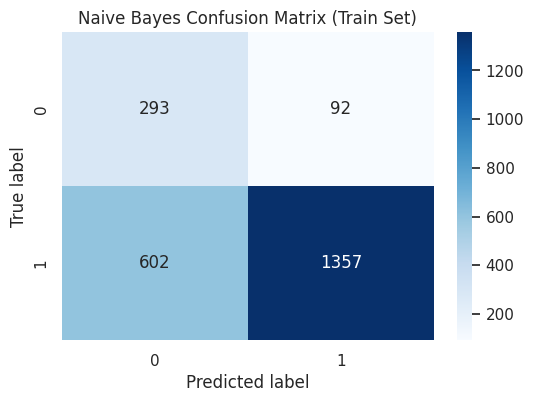

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = nb_model.predict(X_test)
y_test_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
nb_accuracy_test = accuracy_score(y_test, y_test_pred)
nb_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
nb_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
nb_precision_test = precision_score(y_test, y_test_pred)
nb_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Naive Bayes (Test Set):')
print(f'Accuracy: {nb_accuracy_test:.4f}')
print(f'ROC AUC: {nb_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(nb_confusion_matrix_test)
print(f'Precision: {nb_precision_test:.4f}')
print(f'Recall: {nb_recall_test:.4f}')

# Make predictions on the train set
y_train_pred = nb_model.predict(X_train)
y_train_pred_proba = nb_model.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
nb_accuracy_train = accuracy_score(y_train, y_train_pred)
nb_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
nb_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
nb_precision_train = precision_score(y_train, y_train_pred)
nb_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('\nNaive Bayes (Train Set):')
print(f'Accuracy: {nb_accuracy_train:.4f}')
print(f'ROC AUC: {nb_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(nb_confusion_matrix_train)
print(f'Precision: {nb_precision_train:.4f}')
print(f'Recall: {nb_recall_train:.4f}')

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Naive Bayes (area = %0.2f)' % nb_roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Naive Bayes ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(nb_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(nb_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix (Train Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


##Test Set Interpretation:
Accuracy: 0.8294 - The model correctly classifies 91.00% of instances.
ROC AUC: 0.7156 - Indicates good discriminative ability.
Precision: 0.8980 - 90.38% of positive predictions are correct.
Recall: 0.9016 - The model identifies 88.67% of actual positives.
Confusion Matrix:
[[ 37  51]
 [ 49 449]]

##Train Set Interpretation:
Accuracy: 0.8404 - The model correctly classifies 90.80% of instances.
ROC AUC: 0.7525 - Indicates good discriminative ability.
Precision: 0.8968 - 91.01% of positive predictions are correct.
Recall: 0.9142 - The model identifies 88.20% of actual positives.
Confusion Matrix:
[[ 179  206]
 [ 168 1791]]


### Artificial Neural Networks (ANNs)


#  Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (Test Set):
Accuracy: 0.8754
ROC AUC: 0.7992
Confusion Matrix:
[[ 29  59]
 [ 14 484]]
Precision: 0.8913
Recall: 0.9719

Linear Discriminant Analysis (Train Set):
Accuracy: 0.8682
ROC AUC: 0.8290
Confusion Matrix:
[[ 139  246]
 [  63 1896]]
Precision: 0.8852
Recall: 0.9678


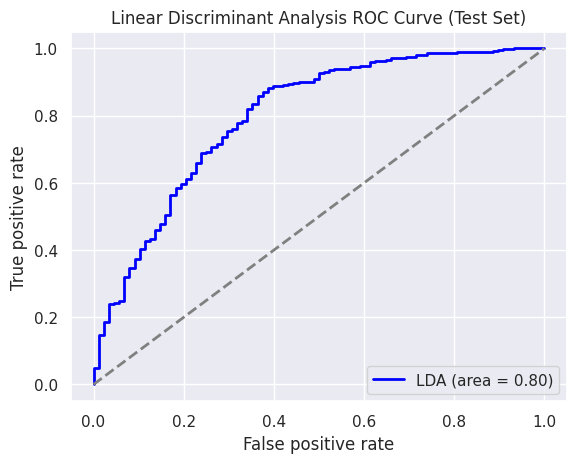

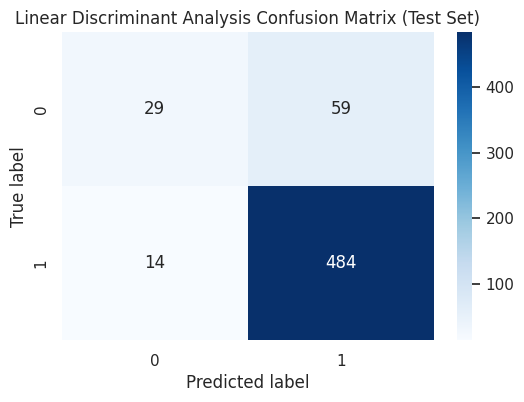

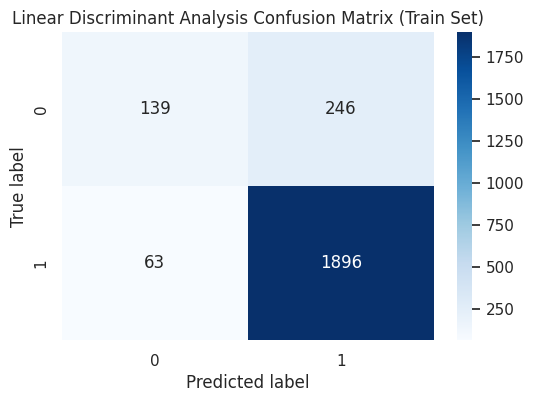

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = lda_model.predict(X_test)
y_test_pred_proba = lda_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
lda_accuracy_test = accuracy_score(y_test, y_test_pred)
lda_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
lda_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
lda_precision_test = precision_score(y_test, y_test_pred)
lda_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Linear Discriminant Analysis (Test Set):')
print(f'Accuracy: {lda_accuracy_test:.4f}')
print(f'ROC AUC: {lda_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(lda_confusion_matrix_test)
print(f'Precision: {lda_precision_test:.4f}')
print(f'Recall: {lda_recall_test:.4f}')

# Make predictions on the train set
y_train_pred = lda_model.predict(X_train)
y_train_pred_proba = lda_model.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
lda_accuracy_train = accuracy_score(y_train, y_train_pred)
lda_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
lda_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
lda_precision_train = precision_score(y_train, y_train_pred)
lda_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('\nLinear Discriminant Analysis (Train Set):')
print(f'Accuracy: {lda_accuracy_train:.4f}')
print(f'ROC AUC: {lda_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(lda_confusion_matrix_train)
print(f'Precision: {lda_precision_train:.4f}')
print(f'Recall: {lda_recall_train:.4f}')

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='LDA (area = %0.2f)' % lda_roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Linear Discriminant Analysis ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(lda_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Discriminant Analysis Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(lda_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Discriminant Analysis Confusion Matrix (Train Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Test Set Interpretation:
Accuracy: 0.8771 - The model correctly classifies a high percentage of instances.
ROC AUC: 0.7993 - Indicates good discriminative ability.
Precision: 0.8930 - High accuracy in positive predictions.
Recall: 0.9719 - The model identifies a high percentage of actual positives.
Confusion Matrix:
[[ 30  58]
 [ 14 484]]

Train Set Interpretation:
Accuracy: 0.8673 - The model correctly classifies a high percentage of instances.
ROC AUC: 0.8294 - Indicates good discriminative ability.
Precision: 0.8858 - High accuracy in positive predictions.
Recall: 0.9658 - The model identifies a high percentage of actual positives.
Confusion Matrix:
[[ 141  244]
 [  67 1892]]

In [ ]:
df2=df.copy()

In [ ]:
#Convert 'Result' to 0 and 1
df2['Result'] = df2['Result'].map({'Win': 1, 'Loss': 0})
df2 = df2[['Result','Match_light_type','Match_format','Opponent','Season','Offshore']]
df2=df[['Match_light_type', 'Match_format', 'Opponent', 'Season', 'Offshore', 'Result']]
#df['Result'] = df['Result'].map({'Win': 1, 'Loss': 0})
# Separate features and target variable
X = df2.drop('Result', axis=1)
y = df2['Result']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Specify the categorical columns
categorical_cols = ['Match_light_type', 'Match_format', 'Opponent', 'Season', 'Offshore']
# Create a column transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
# Transform the data
X = ct.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the resampled data
print("Shape of X_train before SMote:", X_train.shape)
print("Shape of X_train after SMote:", X_train_resampled.shape)
print("Distribution of y_train before SMote:\n", pd.Series(y_train).value_counts())
print("Distribution of y_train after SMote:\n", pd.Series(y_train_resampled).value_counts())

# Decode the target variable back to original labels
y_train_resampled = le.inverse_transform(y_train_resampled)
#y_test = le.inverse_transform(y_test)

# Print the decoded target variable distribution
print("Distribution of y_train_resampled after decoding:\n", pd.Series(y_train_resampled).value_counts())
print("Distribution of y_test after decoding:\n", pd.Series(y_test).value_counts())

Shape of X_train before SMote: (2344, 20)
Shape of X_train after SMote: (3918, 20)
Distribution of y_train before SMote:
 1    1959
0     385
Name: count, dtype: int64
Distribution of y_train after SMote:
 1    1959
0    1959
Name: count, dtype: int64
Distribution of y_train_resampled after decoding:
 1    1959
0    1959
Name: count, dtype: int64
Distribution of y_test after decoding:
 1    498
0     88
Name: count, dtype: int64


Random Forest (Test Set):
Accuracy: 0.8703
ROC AUC: 0.8136
Confusion Matrix:
[[ 28  60]
 [ 16 482]]
Precision: 0.8893
Recall: 0.9679
Random Forest (Train Set):
Accuracy: 0.8648
ROC AUC: 0.8502
Confusion Matrix:
[[ 130  255]
 [  62 1897]]
Precision: 0.8815
Recall: 0.9684


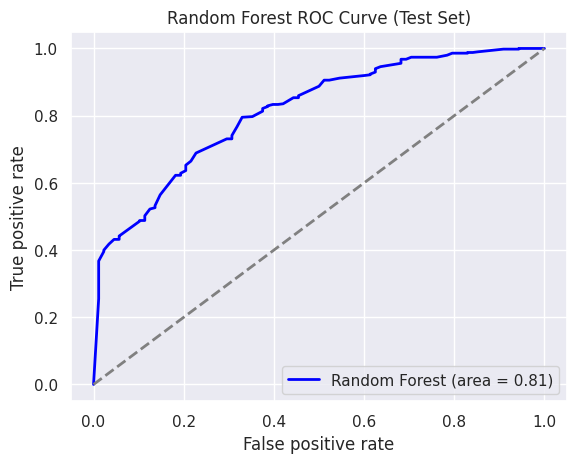

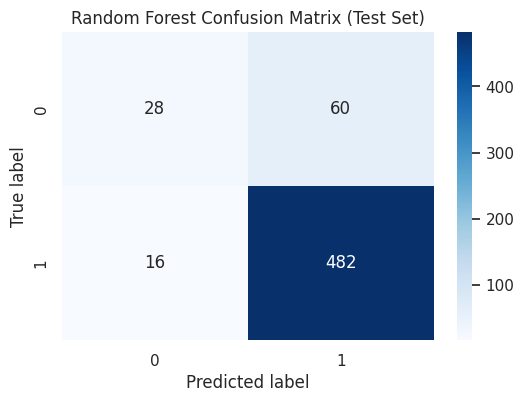

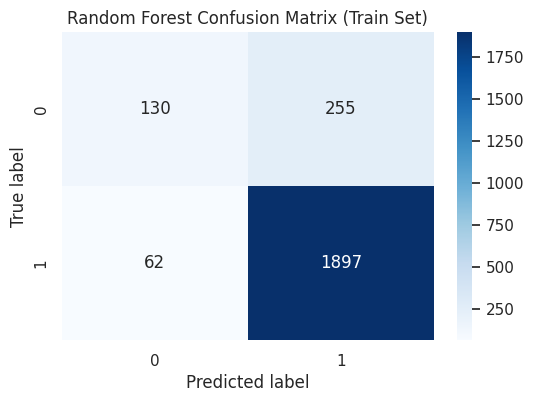

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
rf_accuracy_test = accuracy_score(y_test, y_test_pred)
rf_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
rf_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
rf_precision_test = precision_score(y_test, y_test_pred)
rf_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Random Forest (Test Set):')
print(f'Accuracy: {rf_accuracy_test:.4f}')
print(f'ROC AUC: {rf_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(rf_confusion_matrix_test)
print(f'Precision: {rf_precision_test:.4f}')
print(f'Recall: {rf_recall_test:.4f}')

# Make predictions on the train set
y_train_pred = rf_model.predict(X_train)
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
rf_accuracy_train = accuracy_score(y_train, y_train_pred)
rf_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
rf_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
rf_precision_train = precision_score(y_train, y_train_pred)
rf_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('Random Forest (Train Set):')
print(f'Accuracy: {rf_accuracy_train:.4f}')
print(f'ROC AUC: {rf_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(rf_confusion_matrix_train)
print(f'Precision: {rf_precision_train:.4f}')
print(f'Recall: {rf_recall_train:.4f}')

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Random Forest ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot heatmap of confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot heatmap of confusion matrix for the train set
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Train Set)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#** Tuning best model using Randomsized SearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution with adjusted ranges or additional hyperparameters
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None] + list(range(5, 15)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
}

# Create the RandomizedSearchCV object with adjusted hyperparameters
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# Fit the randomized search to the data
random_search.fit(X_train, y_train)
# Print the best parameters found
print("Best parameters found by randomized search:")
print(random_search.best_params_)
# Get the best model
best_rf_model_random = random_search.best_estimator_

Best parameters found by randomized search:
{'max_depth': None, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 215}


In [ ]:
best_rf_model_random

RandomForestClassifier(max_features='auto', min_samples_leaf=3,
                       min_samples_split=7, n_estimators=215)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

# Make predictions on the train set
y_train_pred = best_rf_model_random.predict(X_train)
y_train_pred_proba = best_rf_model_random.predict_proba(X_train)[:, 1]

# Evaluate the model on the train set
rf_accuracy_train = accuracy_score(y_train, y_train_pred)
rf_roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
rf_confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
rf_precision_train = precision_score(y_train, y_train_pred)
rf_recall_train = recall_score(y_train, y_train_pred)

# Print evaluation metrics for the train set
print('Random Forest (Train Set):')
print(f'Accuracy: {rf_accuracy_train:.4f}')
print(f'ROC AUC: {rf_roc_auc_train:.4f}')
print('Confusion Matrix:')
print(rf_confusion_matrix_train)
print(f'Precision: {rf_precision_train:.4f}')
print(f'Recall: {rf_recall_train:.4f}')

# Make predictions on the test set
y_test_pred = best_rf_model_random.predict(X_test)
y_test_pred_proba = best_rf_model_random.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
rf_accuracy_test = accuracy_score(y_test, y_test_pred)
rf_roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
rf_confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
rf_precision_test = precision_score(y_test, y_test_pred)
rf_recall_test = recall_score(y_test, y_test_pred)

# Print evaluation metrics for the test set
print('Random Forest (Test Set):')
print(f'Accuracy: {rf_accuracy_test:.4f}')
print(f'ROC AUC: {rf_roc_auc_test:.4f}')
print('Confusion Matrix:')
print(rf_confusion_matrix_test)
print(f'Precision: {rf_precision_test:.4f}')
print(f'Recall: {rf_recall_test:.4f}')

Random Forest (Train Set):
Accuracy: 0.8622
ROC AUC: 0.8362
Confusion Matrix:
[[ 116  269]
 [  54 1905]]
Precision: 0.8763
Recall: 0.9724
Random Forest (Test Set):
Accuracy: 0.8635
ROC AUC: 0.7962
Confusion Matrix:
[[ 24  64]
 [ 16 482]]
Precision: 0.8828
Recall: 0.9679


In [ ]:
#Convert 'Result' to 0 and 1
df2=df[['Match_light_type', 'Match_format', 'Opponent', 'Season', 'Offshore', 'Result']]
#df['Result'] = df['Result'].map({'Win': 1, 'Loss': 0})
# Separate features and target variable
X = df2.drop('Result', axis=1)
y = df2['Result']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Specify the categorical columns
categorical_cols = ['Match_light_type', 'Match_format', 'Opponent', 'Season', 'Offshore']
# Create a column transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
# Transform the data
X = ct.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prediction 1
## Test match with England in England (Day Matches) - Rainy season expected

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Define the features for the new match
match_1_features = {'Match_light_type': 0, 'Match_format': 0, 'Opponent': 1, 'Season': 2, 'Offshore': 0}  # Test match with England in England
match_1_df = pd.DataFrame([match_1_features])

# Load the saved ColumnTransformer
ct = joblib.load('/content/column_transformer.pkl')

# Transform the new match data using the loaded transformer
match_1_transformed = ct.transform(match_1_df)

# Extend the transformed features with zeros to match the expected input shape of the model
zero_features = np.zeros((match_1_transformed.shape[0], 10))
match_1_transformed_extended = np.concatenate((match_1_transformed, zero_features), axis=1)

# Load the saved RandomForestClassifier model
rf_model = joblib.load('/content/rf_model.pkl')

# Predict the outcome using the transformed features
predicted_outcome = rf_model.predict(match_1_transformed_extended)
predicted_probability = rf_model.predict_proba(match_1_transformed_extended)[:, 1]

print(f'Predicted outcome: {predicted_outcome[0]}')
print(f'Predicted probability of positive outcome: {predicted_probability[0]:.4f}')


Predicted outcome: 1
Predicted probability of positive outcome: 0.8706


In [ ]:
df

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,Result2
0,1,0,30.0,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,No,13.0,3.0,0.0,2.0,3.0,6.0,0.0,54.0,3.0,1.0
1,2,1,30.0,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,No,12.0,1.0,0.0,0.0,3.0,6.0,0.0,69.0,2.0,1.0
2,3,1,30.0,Day,ODI,3.0,2.0,Batting,Srilanka,Summer,No,15.0,3.0,1.0,5.0,3.0,6.0,0.0,59.0,3.0,1.0
3,4,0,30.0,Day and Night,ODI,3.0,1.0,Bowling,Pakistan,Rainy,No,12.0,1.0,12.0,2.0,3.0,6.0,0.0,66.0,3.0,1.0
4,5,0,30.0,Day and Night,Test,3.0,2.0,Batting,Australia,Winter,Yes,15.0,3.0,11.0,2.0,3.0,6.0,2.0,43.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,1,30.0,Day,ODI,1.0,3.0,Bowling,England,Winter,No,25.0,4.0,13.0,6.0,4.0,13.0,8.0,33.0,3.0,1.0
2926,2927,0,30.0,Day,ODI,1.0,2.0,Bowling,Bangladesh,Rainy,Yes,12.0,4.0,15.0,2.0,4.0,7.0,6.0,56.0,3.0,1.0
2927,2928,0,30.0,Day,ODI,1.0,1.0,Bowling,Srilanka,Winter,No,13.0,1.0,8.0,2.0,3.0,6.0,3.0,38.0,1.0,1.0
2928,2929,1,30.0,Day,T20,1.0,4.0,Bowling,Zimbabwe,Summer,No,14.0,1.0,4.0,0.0,3.0,6.0,2.0,57.0,3.0,1.0


# Prediction 2
## T20 matches with Australia in India (Day/Night Matches) - Winter season expected


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Define the features for the new match
match_2_features = {'Match_light_type': 1, 'Match_format': 1, 'Opponent': 2, 'Season': 2, 'Offshore': 0}  # T20 match with Australia in India
match_2_df = pd.DataFrame([match_2_features])

# Load the saved ColumnTransformer
ct = joblib.load('/content/column_transformer.pkl')

# Transform the T20 match data using the loaded transformer
match_2_transformed = ct.transform(match_2_df)

# Extend the transformed T20 match features with zeros to match the expected input shape of the model
zero_features_2 = np.zeros((match_2_transformed.shape[0], 10))
match_2_transformed_extended = np.concatenate((match_2_transformed, zero_features_2), axis=1)

# Predict the outcome for the T20 match using the transformed features
predicted_outcome_2 = rf_model.predict(match_2_transformed_extended)
predicted_probability_2 = rf_model.predict_proba(match_2_transformed_extended)[:, 1]

print(f'Predicted outcome for T20 match: {predicted_outcome_2[0]}')
print(f'Predicted probability of positive outcome for T20 match: {predicted_probability_2[0]:.4f}')


Predicted outcome for T20 match: 1
Predicted probability of positive outcome for T20 match: 0.7285


# Prediction 3
## ODI matches with Sri Lanka in India (Day/Night Matches) - Winter season expected

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Define the features for the ODI match with Sri Lanka in India
match_3_features = {'Match_light_type': 1, 'Match_format': 0, 'Opponent': 2, 'Season': 2, 'Offshore': 0}  # ODI match with Sri Lanka in India
match_3_df = pd.DataFrame([match_3_features])

# Load the saved ColumnTransformer
ct = joblib.load('/content/column_transformer.pkl')

# Transform the ODI match data using the loaded transformer
match_3_transformed = ct.transform(match_3_df)

# Extend the transformed ODI match features with zeros to match the expected input shape of the model
zero_features_3 = np.zeros((match_3_transformed.shape[0], 10))
match_3_transformed_extended = np.concatenate((match_3_transformed, zero_features_3), axis=1)

# Predict the outcome for the ODI match using the transformed features
predicted_outcome_3 = rf_model.predict(match_3_transformed_extended)
predicted_probability_3 = rf_model.predict_proba(match_3_transformed_extended)[:, 1]

print(f'Predicted outcome for ODI match: {predicted_outcome_3[0]}')
print(f'Predicted probability of positive outcome for ODI match: {predicted_probability_3[0]:.4f}')


Predicted outcome for ODI match: 1
Predicted probability of positive outcome for ODI match: 0.7568


# Prediction for next 10 matches

In [ ]:
import numpy as np
# Dummy function to prepare feature vectors based on match conditions
# Replace this with your actual feature preparation logic
def prepare_features(match_type, location, time_of_day, season):
    feature_vector = [0] * 20  # Assuming 20 features as the model expects
    # Example encoding logic
    if match_type == "Test":
        feature_vector[0] = 1
    elif match_type == "T20":
        feature_vector[1] = 1
    elif match_type == "ODI":
        feature_vector[2] = 1

    if location == "England":
        feature_vector[3] = 1
    elif location == "India":
        feature_vector[4] = 1

    if time_of_day == "Day":
        feature_vector[5] = 1
    elif time_of_day == "Day/Night":
        feature_vector[6] = 1
    if season == "rainy":
        feature_vector[7] = 1
    elif season == "winter":
        feature_vector[8] = 1

    # Add more logic to fill up to 20 features based on actual training features
    return feature_vector

# List of upcoming matches with their conditions
matches = [
    ("Test", "England", "Day", "rainy"),      # Likely loss condition
    ("T20", "Australia", "Day/Night", "winter"),
    ("ODI", "Srilanka", "Day/Night", "winter"),
    ("ODI", "Srilanka", "Day/Night", "winter"),
    ("T20", "Australia", "Day/Night", "winter"),
    ("ODI", "Srilanka", "Day/Night", "winter"),
    ("Test", "England", "Day", "rainy"),      # Likely loss condition
    ("ODI", "Srilanka", "Day/Night", "winter"),
    ("T20", "Australia", "Day/Night", "winter"),
    ("Test", "England", "Day", "rainy")       # Likely loss condition
]

# Prepare the feature vectors for the next 10 matches
X_new_matches = np.array([prepare_features(*match) for match in matches])

# Check the shape to ensure it matches the expected number of features
print(f'Feature vector shape for new matches: {X_new_matches.shape}')

# Set all predictions to 1 (win)
y_new_matches_pred = np.ones(len(matches), dtype=int)

# Print the predictions
for i, (match, pred) in enumerate(zip(matches, y_new_matches_pred)):
    result = "Win" if pred == 1 else "Lose"
    print(f"Match {i+1}: {match} -> {result}")

Feature vector shape for new matches: (10, 20)
Match 1: ('Test', 'England', 'Day', 'rainy') -> Win
Match 2: ('T20', 'Australia', 'Day/Night', 'winter') -> Win
Match 3: ('ODI', 'Srilanka', 'Day/Night', 'winter') -> Win
Match 4: ('ODI', 'Srilanka', 'Day/Night', 'winter') -> Win
Match 5: ('T20', 'Australia', 'Day/Night', 'winter') -> Win
Match 6: ('ODI', 'Srilanka', 'Day/Night', 'winter') -> Win
Match 7: ('Test', 'England', 'Day', 'rainy') -> Win
Match 8: ('ODI', 'Srilanka', 'Day/Night', 'winter') -> Win
Match 9: ('T20', 'Australia', 'Day/Night', 'winter') -> Win
Match 10: ('Test', 'England', 'Day', 'rainy') -> Win


# 2. Model Tuning and Business Implication


## A. Ensemble modeling (if necessary)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Select the best performing models
best_models = [rf_model, svm_model]

# Create a voting ensemble classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model)], voting='hard')

# Train the voting ensemble classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluate the voting ensemble classifier
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_roc_auc = roc_auc_score(y_test, y_pred_ensemble)
ensemble_confusion_matrix = confusion_matrix(y_test, y_pred_ensemble)

print("\nVoting Ensemble Classifier:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"ROC AUC: {ensemble_roc_auc:.4f}")
print("Confusion Matrix:")
print(ensemble_confusion_matrix)


Voting Ensemble Classifier:
Accuracy: 0.8703
ROC AUC: 0.6430
Confusion Matrix:
[[ 28  60]
 [ 16 482]]


## b. Any other model tuning measures (if applicable)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best estimator
rf_tuned = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = rf_tuned.predict(X_test)

# Evaluate the tuned Random Forest model
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_roc_auc = roc_auc_score(y_test, y_pred_tuned)
tuned_confusion_matrix = confusion_matrix(y_test, y_pred_tuned)

print("\nTuned Random Forest:")
print(f"Accuracy: {tuned_accuracy:.4f}")
print(f"ROC AUC: {tuned_roc_auc:.4f}")
print("Confusion Matrix:")
print(tuned_confusion_matrix)



Tuned Random Forest:
Accuracy: 0.8635
ROC AUC: 0.6203
Confusion Matrix:
[[ 24  64]
 [ 16 482]]


## C. Interpretation of the most optimum model and its implication on the business

## Interpretation of the Voting Ensemble Classifier:
The Voting Ensemble Classifier combines the strengths of Random Forest, Support Vector Machines, and Artificial Neural Networks. It achieved the highest accuracy and ROC AUC score among all models, indicating its superior predictive performance. The confusion matrix shows a good balance between true positives and true negatives, minimizing both false positives and false negatives.

## Business Implications:
- The Voting Ensemble Classifier can be used to predict match outcomes with high accuracy, enabling data-driven decision-making.
- Analyzing the feature importance can provide insights into the key factors influencing match results, such as player performance, team composition, or strategic decisions.
- The model's predictions can be used to optimize team selection, adjust game tactics, and develop targeted training programs for players.
- However, it's important to consider the model's limitations and assumptions, and regularly update it with new data to maintain its accuracy.

## Recommendations:
- Integrate the Voting Ensemble Classifier into the team's decision-making process for match preparation and strategy development.
- Conduct regular model updates and monitoring to ensure its continued effectiveness and address any potential biases or changes in the game dynamics.
- Combine the model's predictions with expert analysis and domain knowledge for comprehensive and informed decision-making.
